***
<img align="right" src="images/Logo_Università_Padova.png" alt="Drawing" style="width: 500px"/>
<img align="right" src="images/Logo_Physics_of_Data.jpg" alt="Drawing" style="width: 223px"/>

# AS4PA Final Project
# Study of rare $\Lambda_b^0$ decay using multivariate analysis techniques

### Authors
* [**Ardino Rocco**](https://github.com/RoccoA97) (University of Padua, Physics of Data)
* [**Valente Alessandro**](https://github.com/mastrovalentz) (University of Padua, Physics of Data)



### Abstract
The b-Baryon decay

$$
\Lambda_b^0
\longrightarrow
\Lambda_c^+ 3\pi
$$

has never been observed, however it is a fundamental ingredient for the studies of lepton universality in semileptonic $\Lambda_b^0$ decays. Using a sample of LHCb data prepared with observables useful for discriminating signal from background events, the student is required to perform a signal selection separating interesting events from background using multivariate analysis techniques, including Deep Neural Networks. After having selected the best figure-of-merit able to successfully solve the problem, a detailed study of the effect on the multivariate analysis due to different fractions of the total sample used for training the network is required (minimizing the overtraining if present). The performances of the sample selection will be studied as a function of the different regularization algorithms used. After this the sample selection will be performed with the Deep Neural Network, where an optimization of the number of neurons, the activation function type and the cost function is required.
***

<br>
<br>
<br>
<br>
<br>

***
# Index <a class="anchor" id="FP.i"></a>

* 0. [R Packages Load](#AS4PA_FP.0.)
* 1. [Introduction](#AS4PA_FP.1.)
* 2. [Deep Learning and Neural Networks](#AS4PA_FP.2.)
    * 2.1. [Theoretical background](#AS4PA_FP.2.1.)
    * 2.2. [The hyperparameters](#AS4PA_FP.2.2.)
    * 2.3. [Neural Networks in R](#AS4PA_FP.2.3.)
* 3. [The Datasets](#AS4PA_FP.3.)
    * 3.1. [Description of the features](#AS4PA_FP.3.1.)
    * 3.2. [Visualization of the features](#AS4PA_FP.3.2.)
    * 3.3. [Cutted LHCb dataset](#AS4PA_FP.3.3.)
    * 3.4. [Estimation of the number of signal events in LHCb dataset](#AS4PA_FP.3.4.)
* 4. [Neural Network Model Building and Tuning](#AS4PA_FP.4.)
    * 4.1. [Dataset fraction for training](#AS4PA_FP.4.1.)
    * 4.2. [Batch size and number of epochs](#AS4PA_FP.4.2.)
    * 4.3. [Number of neurons per layer](#AS4PA_FP.4.3.)
    * 4.4. [Dropout rate per layer](#AS4PA_FP.4.4.)
    * 4.5. [Activation functions](#AS4PA_FP.4.5.)
    * 4.6. [Loss function](#AS4PA_FP.4.6.)
    * 4.7. [Optimizer](#AS4PA_FP.4.7.)
    * 4.8. [Regularizer](#AS4PA_FP.4.8.)
* 5. [Results](#AS4PA_FP.5.)
    * 5.1. [First view of Neural Networks output](#AS4PA_FP.5.1.)
    * 5.2. [Deeper analysis of Neural Networks output](#AS4PA_FP.5.2.)
* 6. [Conclusions](#AS4PA_FP.6.)
***

<br>
<br>
<br>
<br>
<br>

***
## 0. - R Packages Load <a class="anchor" id="AS4PA_FP.0."></a>
* [Index](#FP.i)

Before going on, we load here for the sake of simplicity and clarity all the needed libraries for the work:

* **```keras```**: R interface to keras;
* **```repr```**: package for a better graphics handling on jupyter notebooks;
* **```ggplot2```**: package which provides several tools for plotting;
* **```gridExtra```**: package which provides several tools for grid plotting;

In [1]:
library(keras)
library(repr)
library(ggplot2)
library(gridExtra)

We also load some functions to compact the analysis and avoid useless code in the presentation. Everything can be found [**here**](https://github.com/mastrovalentz/Adv_Stat_Final_Project).

In [2]:
source("../code/plot_all_input_features.R")
source("../code/plot_all_cutting_features.R")
source("../code/plot_cutted_dataset.R")
source("../code/plot_grid_accuracies.R")
source("../code/SigEstimation.R")

***

<br>
<br>
<br>
<br>
<br>

***
## 1. - Introduction <a class="anchor" id="AS4PA_FP.1."></a>
* [Index](#FP.i)

This is the report for the final project of Advanced Statistics for Physics Analysis course (A.Y. 2019/20).

The object of study is a classical problem of **signal over background recognition**, but we try to tackle this task through a **machine learning approach**. In particular, we exploit the power of **Neural Networks** for our purpose and we perform several grid searches to optimize the hyperparameters of the network.

Concerning the physical problem under study, we use as a benchmark the rare decay of $\Lambda_b^0$ baryon. Its decay channel into a $\Lambda_c^+$ baryon has the following scheme:

$$
\Lambda_b^0
\longrightarrow
\Lambda_c^{*+} 3\pi
$$

where:

* $\Lambda_c^{*+} = \Lambda_c^{+} (2625)$;
* $\Lambda_c^{*+} \longrightarrow \Lambda_c^{+} \pi^-\pi^+$;
* $\Lambda_c^{+}  \longrightarrow p K^- \pi^+$;


This decay channel has never been observed, therefore it is a fundamental ingredient for the studies of lepton universality in semileptonic $\Lambda_b^0$ decays. In this physical context, a sample of LHCb experiment is taken into account, with multiple observables useful for discriminating signal from background events by performing a multivariate analysis.

**Goals**

In summary, our main concerns will be:
* before introducing the learning algorithms, the **visualization of the features** for both signal and background datasets, in order to find which are the ones with greater discriminating power;
* the **implementation of the Neural Network** and of the learning algorithm in R;
* optimizing the disciminating power of the trained Network by **tuning the hyperparameters**, such as the architecture, the regularizers, the optimizer and some other learning stuff;
* **testing the performances** of the trained and tuned Network on a dataset from LHCb collaboration.
***

<br>
<br>
<br>
<br>
<br>

***
## 2. - Applied Deep Learning and Neural Networks <a class="anchor" id="AS4PA_FP.2."></a>
* [Index](#FP.i)

<br>
<br>

### 2.1. - Theoretical background <a class="anchor" id="AS4PA_FP.2.1."></a>
* [Index](#FP.i)

Deep Learning sits at the forefront of many important advances in Machine Learning. Its use of **Artificial Neural Networks (ANNs)**, resembling the human brain structure, has been proven to be extremely successful. In particular, **Deep Neural Networks (DNNs)** and **Convolutional Neural Networks (CNNs)** are among the state-of-art tools of ML field and are capable of processing data with some hidden features to human eye and peculiar spatial and/or temporal patterns, especially in the case of CNNs.

In this work we will focus on the DNN computational models to solve a classical problem in High Energy Physics (HEP): signal over background discrimination. This problem can be faced with standard techniques, but in most of cases in a way model-dependent, by performing fits on cutted spectra to identify the background and the signal distributions that best fit to the data. Neural Networks provide a **model-independent** way to tackle this task and can take into account a very large number of features in the discrimination, performing in a natural way multivariate analyses with a natural simplicity.

Before going on, we provide a basic introduction on the working principles of Artificial Neural Networks.

#### **DNN**
A DNN is an artificial neural network with multiple layers between the input and output layers. The DNN finds the correct mathematical manipulation to turn the input into the output, whether it be a linear relationship or a non-linear relationship. The key mathematical operation employed in their layers is a **general matrix multiplication** followed by the application of a so-called **activation function** to its output. An idea of the structure of a DNN is given in the following figure (Tikz source code in [**[2]**](#references)).
<center>
    <img src="images/DNN.png" alt="Drawing" style="width: 750px"/>
</center>

#### **CNN**
The key mathematical operation employed in their layers is the **convolution**, used in place of the general matrix multiplication. These specialized **Convolutional Layers** are used along with **Pooling Layers**, which reduce the dimensionality of a layer output through operations in blocks like min/max or average. Moreover, they can even be connected after shape flattening to a classical DNN. An idea of this structure is given in the following figure (Tikz source code in [**[2]**](#references)).
<center>
    <img src="images/CNN.png" alt="Drawing" style="width: 500px"/>
</center>

<br>
<br>

### 2.2. - The hyperparameters <a class="anchor" id="AS4PA_FP.2.2."></a>
* [Index](#FP.i)

The flexibility of NNs is also one of their main drawbacks. In fact, there are **many hyperparameters to tweak**, as we will see in this work. But what do we mean with the word "hyperparameter"? A NN can parametrize a wide set of functions with the right choice of **weights and biases**, which are the free parameters of the net. However, there are many other parameters we have to consider and tune if we want to answer to our demands and **improve the generalization power** of the Network. The most important ones are listed below:

* the **fraction of the total sample** used for training the network;
* the input **batch size** and the **number of epochs** of training;
* the architecture of the network, namely the **number of layers** (which in our case is fixed to reduce the computational effort) and the **number of neurons per layer**;
* the **dropout rate** of the neurons;
* the **activation function** for every layer;
* the **loss function**;
* the **optimizer** and its parameters;
* the **regularizer** and its parameters.

In this work, we are going to tweak them in the presented order and step by step. For this purpose, the method of grid search will be employed along with cross validation techniques to obtain more stable results. All this stuff and its implementation will be described in the next subsection.

<br>
<br>

### 2.3. - Neural Networks in R <a class="anchor" id="AS4PA_FP.2.3."></a>
* [Index](#FP.i)

For the practical implementation of the neural networks, we have employed an R interface to ```keras```, a Python API for artificial networks implementation. In order to minimize the effort in the hyperparameters tuning, we have implemented a function wrapper over the network model, where the function arguments are the hyperparameters. In the following cells we show its implementation.

**```build_model``` function (example of a model)**

In [3]:
build_model <- function(params, nFeat) {
    model <- keras_model_sequential()
    model %>%
        # Dense   Layer 1
        layer_dense  (units              = params$unit1,
                      activation         = 'relu', 
                      input_shape        = nFeat, 
                      kernel_regularizer = regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
        # Dropout Layer 1
        layer_dropout(rate               = params$dropout1)                                           %>%
        # Dense   Layer 2
        layer_dense  (units              = params$unit2,
                      activation         = 'relu',
                      kernel_regularizer = regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
        # Dropout Layer 2
        layer_dropout(rate               = params$dropout2)                                           %>%
        # Dense   Layer 3
        layer_dense  (units              = params$unit3,
                      activation         = 'relu',
                      kernel_regularizer = regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
        # Dropout Layer 2
        layer_dropout(rate               = params$dropout3)                                           %>%
        # Dense   Layer 4
        layer_dense  (units              = 1,
                      activation         = 'sigmoid')

    model %>% 
        compile(loss      = 'binary_crossentropy',
                optimizer = optimizer_rmsprop(),
                metrics   = c('accuracy'))
    
    return(model)
}

In [4]:
myParams <- flags(
    flag_numeric("dropout1", 0.1),
    flag_numeric("dropout2", 0.1),
    flag_numeric("dropout3", 0.1),
    
    flag_numeric("unit1", 128),
    flag_numeric("unit2", 64),
    flag_numeric("unit3", 32),
    
    flag_numeric("l1_coeff", 1e-4),
    flag_numeric("l2_coeff", 1e-5)
)

***

<br>
<br>
<br>
<br>
<br>

***
## 3. - The Datasets <a class="anchor" id="AS4PA_FP.3."></a>
* [Index](#FP.i)

Now, we load the three datasets needed for the analysis. They can be found [here](https://drive.google.com/drive/u/1/folders/1xKJ0dwvtmua-6UiqeI0TiacnlKsNqvWL).
Since the three datasets are stored in ```csv``` files, we exploit the R function ```read.csv``` to load them.

In [5]:
data.bkg  <- read.csv("../data/background.csv")
data.sig  <- read.csv("../data/MC_signal.csv")
data.lhcb <- read.csv("../data/data_lhcb.csv")

In [6]:
cat("Dataset: Background simulated -> data.frame",   dim(data.bkg)[1],  "x", dim(data.bkg)[2],  "\n")
cat("Dataset: Signal simulated     -> data.frame  ", dim(data.sig)[1],  "x", dim(data.sig)[2],  "\n")
cat("Dataset: LHCb                 -> data.frame",   dim(data.lhcb)[1], "x", dim(data.lhcb)[2], "\n")

Dataset: Background simulated -> data.frame 403158 x 29 
Dataset: Signal simulated     -> data.frame   1490 x 29 
Dataset: LHCb                 -> data.frame 472750 x 29 


After loading all the dataset, it is reasonable to check if there are missing or invalid numbers.

In [7]:
if (!sum(is.na(data.bkg ))) cat("No invalid number in background simulated dataset", "\n")
if (!sum(is.na(data.sig ))) cat("No invalid number in signal simulated dataset"    , "\n")
if (!sum(is.na(data.lhcb))) cat("No invalid number in lhcb dataset"                      )

No invalid number in background simulated dataset 
No invalid number in signal simulated dataset 
No invalid number in lhcb dataset

After having checked that there are no missing or invalid entries, we can move forward in the analysis.

<br>
<br>

### 3.1. - Description of the features <a class="anchor" id="AS4PA_FP.3.1."></a>
* [Index](#FP.i)

**Discriminating features**

After loading all the data in R, some of the main features of the datasets are visualized in order to clearly understand which are the ones with higher discriminating power between signal and background. This selection has been discussed in [**[1]**](#AS4PA_FP.REF.). A table of these discriminating features is given, showing their identification code.

| Feature Id | Feature Code                      | Feature Meaning                                      |
| :-:        | :-:                               | :-:                                                  |
| 3          | <b>Lambda_c_MM_F             </b> | $\Lambda_c^+$ invariant mass                         |
| 6          | <b>lcZDecLSigma_F            </b> | $\Lambda_c^+$ z decay length over error              |
| 7          | <b>lcstarZDecLSigma_F        </b> | $\Lambda_c^{+*}$ z decay length over error           |
| 8          | <b>lcDecTime_F               </b> | $\Lambda_c^+$ decay time                             |
| 9          | <b>lcstarDecTime_F           </b> | $\Lambda_c^{+*}$ decay time                          |
| 10         | <b>lbDecTime_F               </b> | $\Lambda_b^0$ decay time                             |
| 11         | <b>lcDecVerChi2_F            </b> | $\Lambda_c^+$ decay vertex                           |
| 12         | <b>lcstarDecVerChi2_F        </b> | $\Lambda_c^{+*}$ decay vertex                        |
| 14         | <b>Lambda_b0_DIRA_OWNPV_F    </b> | $\Lambda_b^0$ DIRA of PV                             |
| 17         | <b>pair0_3pi_F               </b> | Pair mass of pions 1                                 |
| 18         | <b>pair1_3pi_F               </b> | Pair mass of pions 2                                 |

<!-- | Feature Id | Feature Code                      | Feature Meaning                                      |
| :-:        | :-:                               | :-:                                                  |
| 2          | <b>lcstar_MM_F               </b> | $\Lambda_c^{+*}$ invariant mass                      |
| 3          | <b>Lambda_c_MM_F             </b> | $\Lambda_c^+$ invariant mass                         |
| 4          | <b>Lambda_b0_MM_F            </b> | $\Lambda_b^0$ invariant mass                         |
| 5          | <b>lc_p_ProbNNp_F            </b> | Probability of $\Lambda_c^+p$ identified as a proton |
| 6          | <b>lcZDecLSigma_F            </b> | $\Lambda_c^+$ z decay length over error              |
| 7          | <b>lcstarZDecLSigma_F        </b> | $\Lambda_c^{+*}$ z decay length over error           |
| 8          | <b>lcDecTime_F               </b> | $\Lambda_c^+$ decay time                             |
| 9          | <b>lcstarDecTime_F           </b> | $\Lambda_c^{+*}$ decay time                          |
| 10         | <b>lbDecTime_F               </b> | $\Lambda_b^0$ decay time                             |
| 11         | <b>lcDecVerChi2_F            </b> | $\Lambda_c^+$ decay vertex                           |
| 12         | <b>lcstarDecVerChi2_F        </b> | $\Lambda_c^{+*}$ decay vertex                        |
| 13         | <b>lbDecVerChi2_F            </b> | $\Lambda_b^0$ decay vertex                           |
| 14         | <b>Lambda_b0_DIRA_OWNPV_F    </b> | $\Lambda_b^0$ DIRA of PV                             |
| 15         | <b>DeltaM_F                  </b> | $\Delta M$                                           |
| 16         | <b>pair_lcstar_F             </b> | Pair mass of the two $\pi$ of the $\Lambda_c^{∗+}$   |
| 17         | <b>pair0_3pi_F               </b> | Pair mass of the two $\pi_0$ and $\pi_1$ (???)       |
| 18         | <b>pair1_3pi_F               </b> | Pair mass of the two $\pi_1$ and $\pi_2$ (???)       |
| 19         | <b>Lambda_b0_BKGCAT_F        </b> | ???                                                  |
| 20         | <b>lcstar_BKGCAT_F           </b> | ???                                                  |
| 21         | <b>Lambda_c_BKGCAT_F         </b> | ???                                                  |
| 22         | <b>tau_pion0_ProbNNpi_F      </b> | ???                                                  |
| 23         | <b>tau_pion1_ProbNNpi_F      </b> | ???                                                  |
| 24         | <b>tau_pion2_ProbNNpi_F      </b> | ???                                                  |
| 25         | <b>lcstar_pim_ProbNNpi_F     </b> | ???                                                  |
| 26         | <b>lcstar_pip_ProbNNpi_F     </b> | ???                                                  |
| 27         | <b>Lambda_b0_ENDVERTEX_CHI2_F</b> | ???                                                  |
| 28         | <b>Lambda_c_ENDVERTEX_CHI2_F </b> | ???                                                  |
| 29         | <b>lcstar_ENDVERTEX_CHI2_F   </b> | ???                                                  | -->

**Features for background reduction and cuts**

Some other features useful for background reduction are inside the dataset. These will be used to reduce the too large quantity of background events inside the LHCb dataset before giving it in input to the trained network. Again, this selection has been discussed in [**[1]**](#AS4PA_FP.REF.). A table of these discriminating features is given, showing their identification code. Here, a table of these features for cuts are given along with their identification code.

| Feature Id | Feature Code                      | Feature Meaning              | Feature Cuts (OR to be considered between the two cuts)                                   |
| :-:        | :-:                               | :-:                          | :-------------------------:                                                               |
| 4          | <b>Lambda_b0_MM_F            </b> | $\Lambda_b^0$ invariant mass | $5550 \ \text{MeV}c^{-2} < m(\Lambda_b^0) < 5680 \ \text{MeV}c^{-2}$                      |
| 15         | <b>DeltaM_F                  </b> | $\Delta M$                   | $\Delta M < 360 \ \text{MeV}c^{-2}$                                                       |

<br>
<br>

### 3.2. - Visualization of the features <a class="anchor" id="AS4PA_FP.3.2."></a>
* [Index](#FP.i)

**Feature for discrimination**

In order to plot all these features for every dataset, we employ an user defined function (implemented [**here**](https://github.com/mastrovalentz/Adv_Stat_Final_Project/blob/master/code/plot_all_input_features.R)).

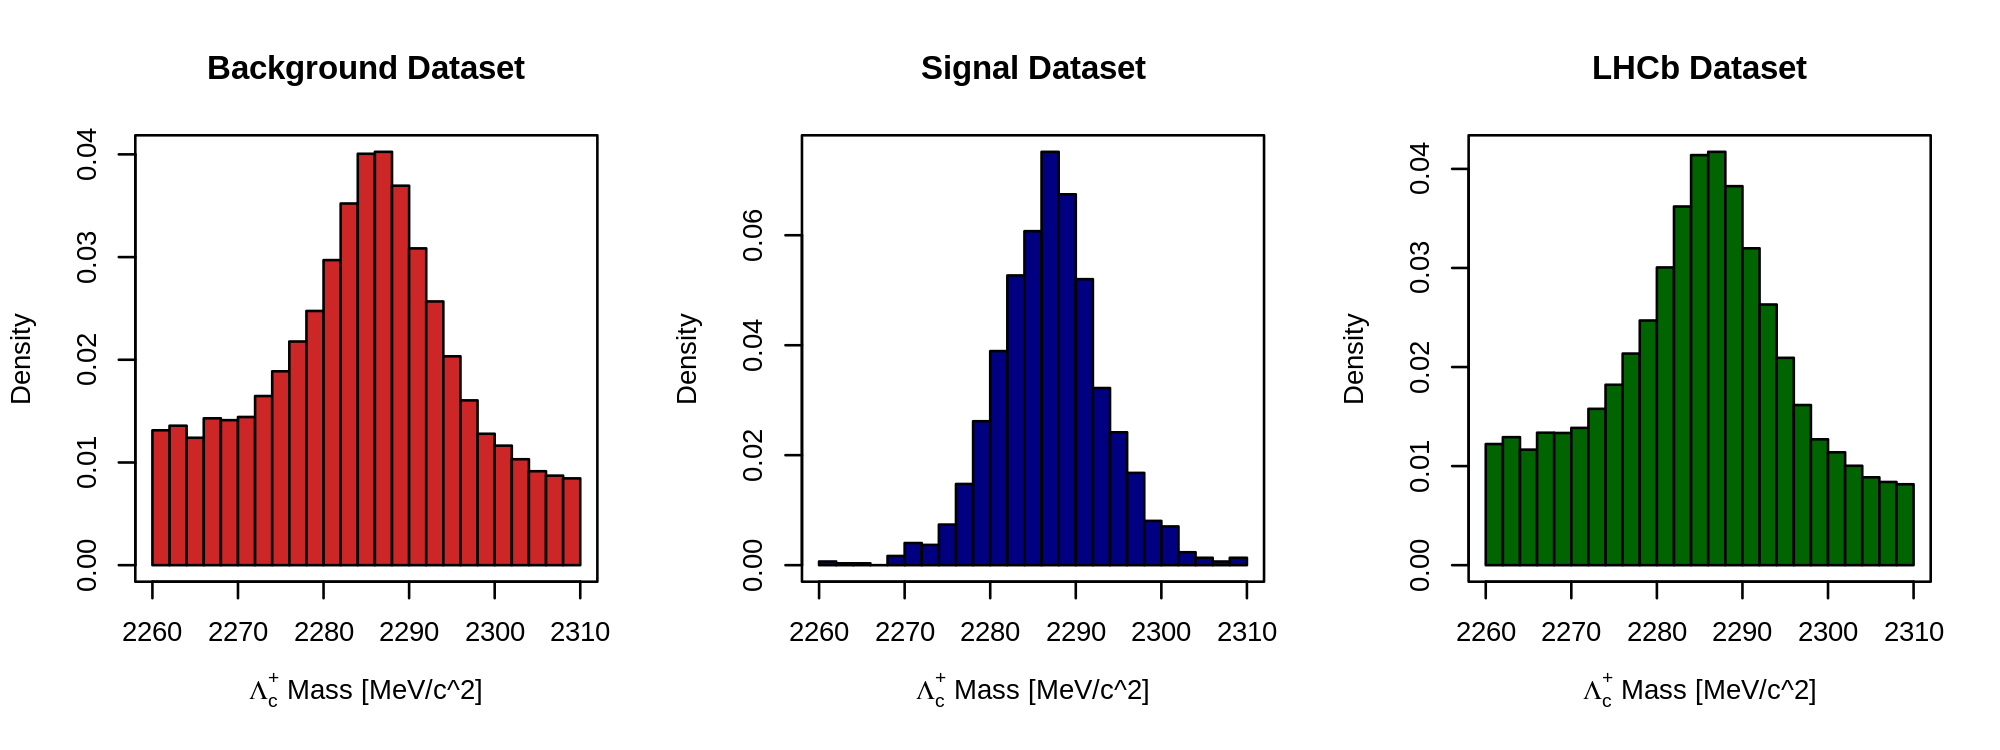

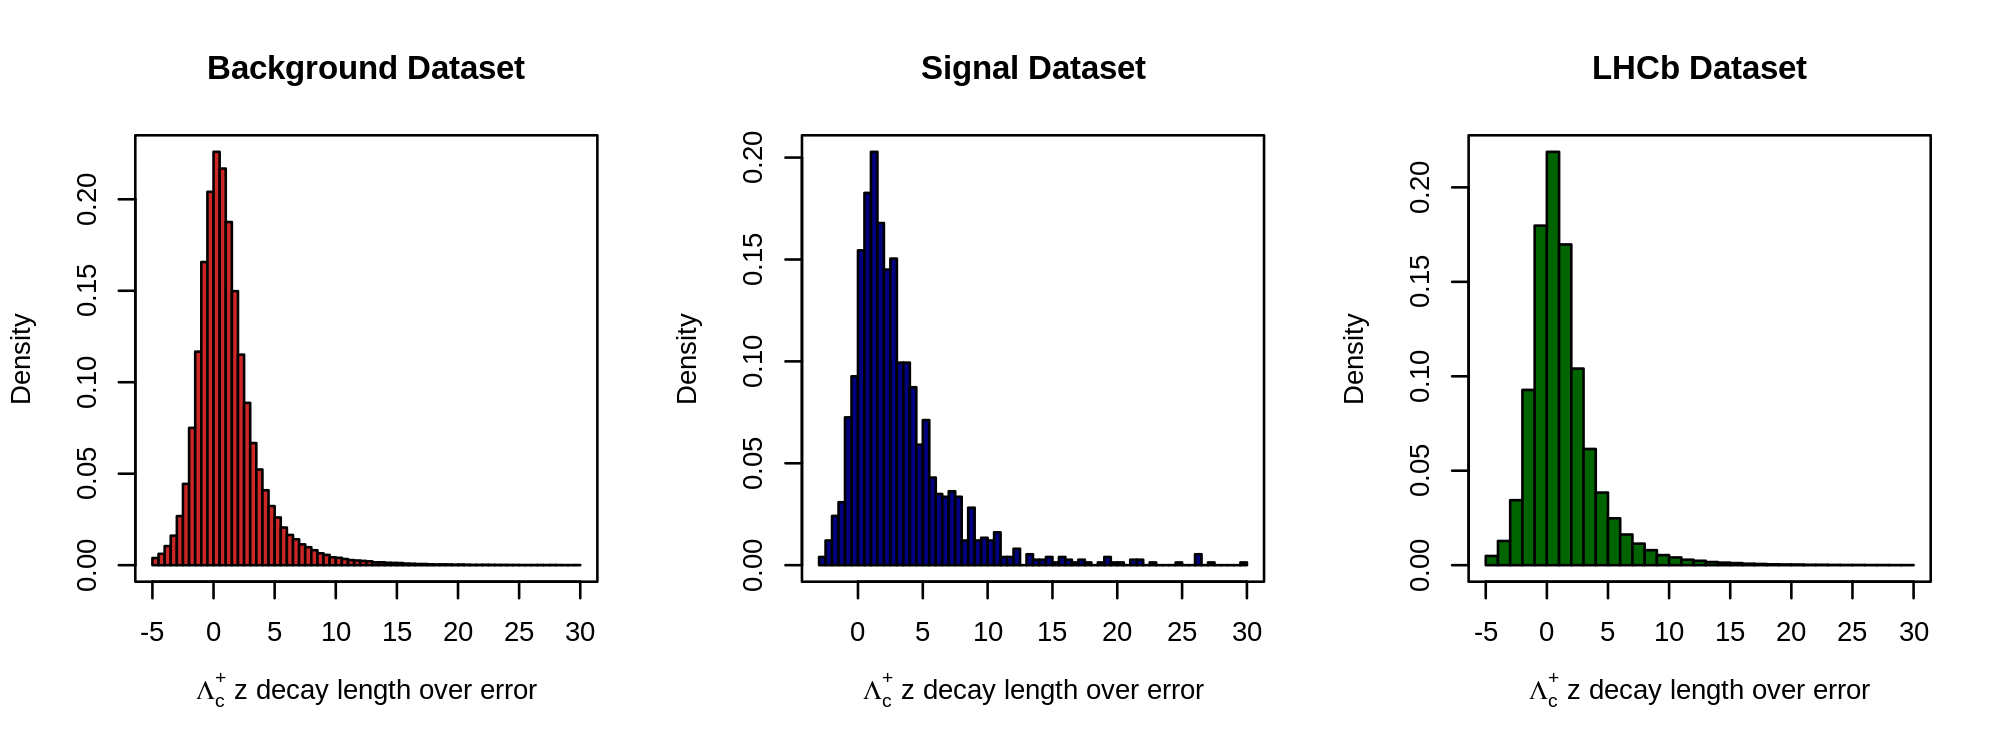

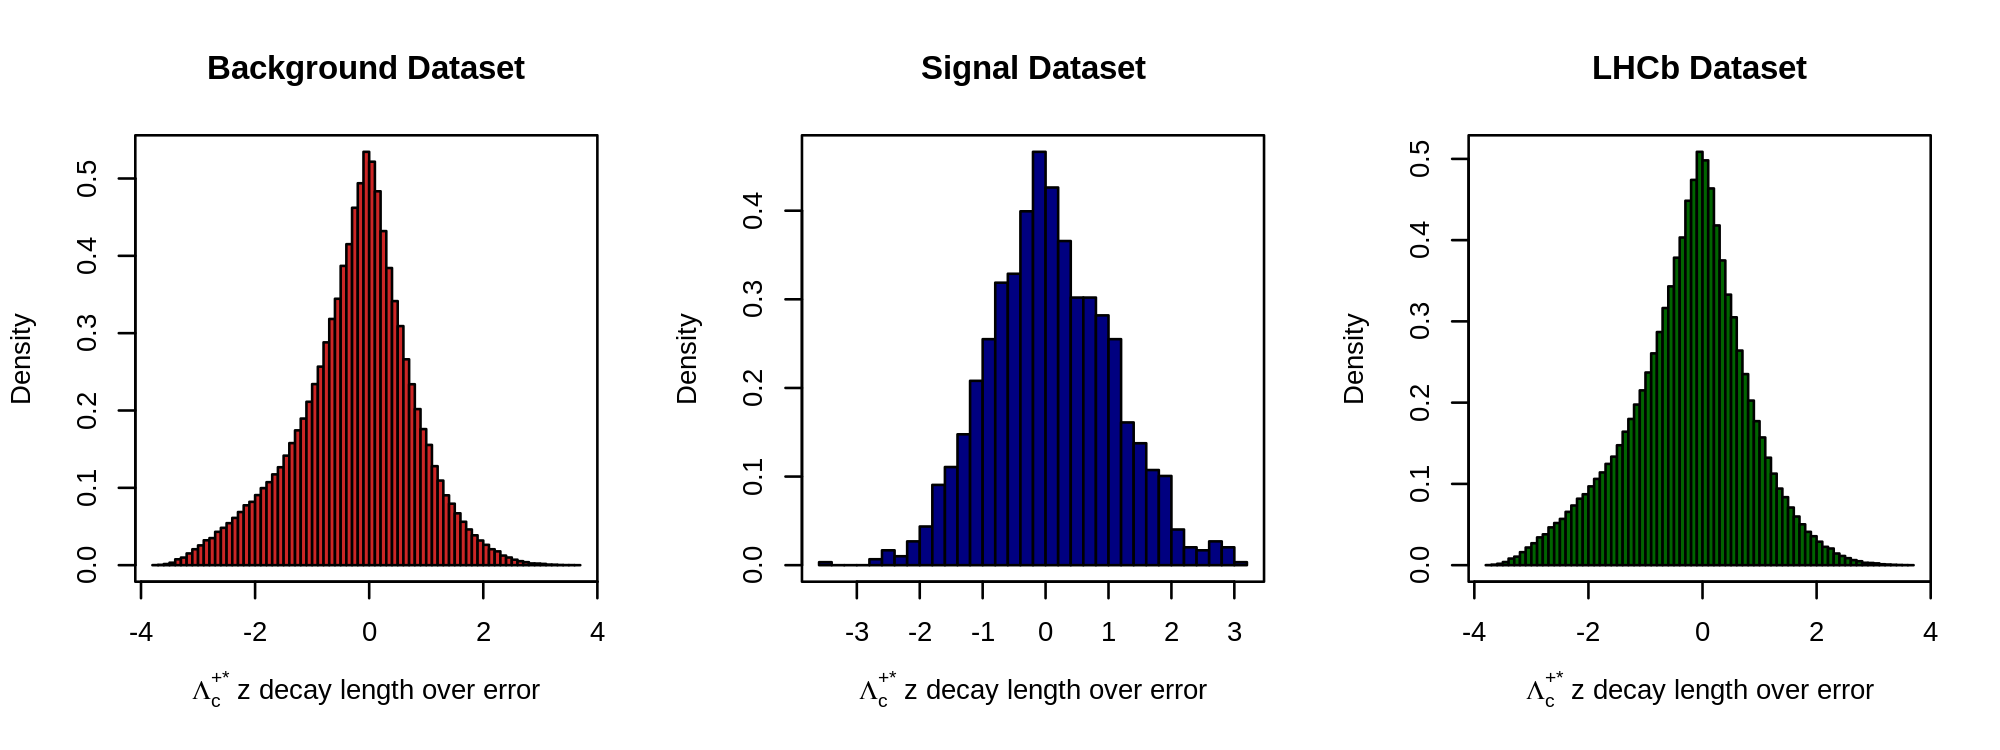

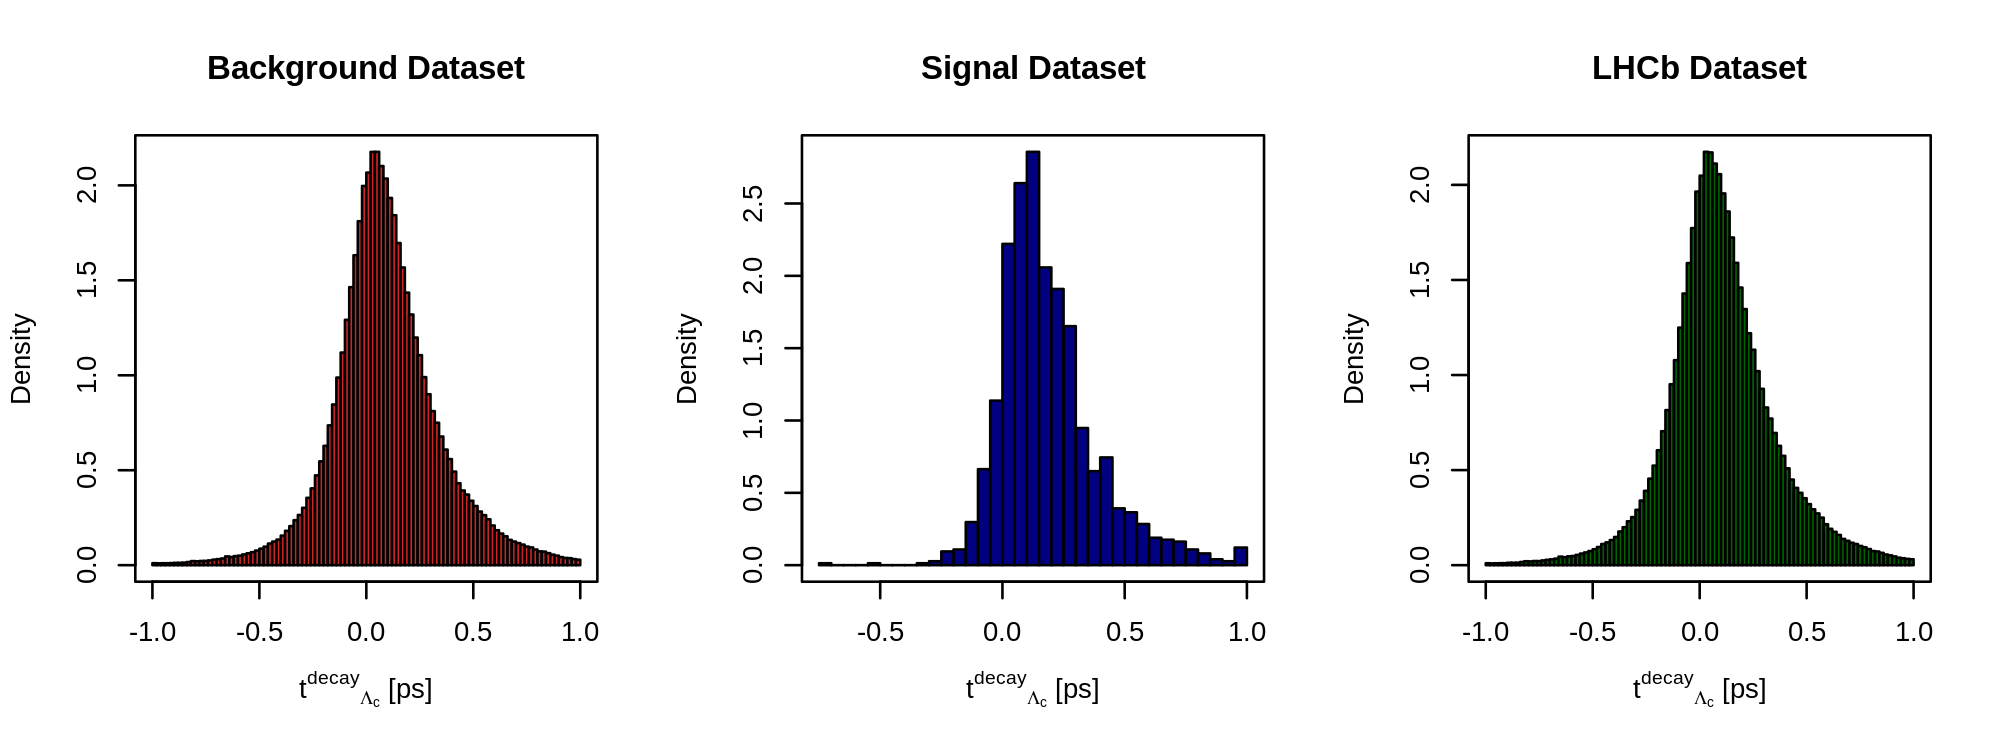

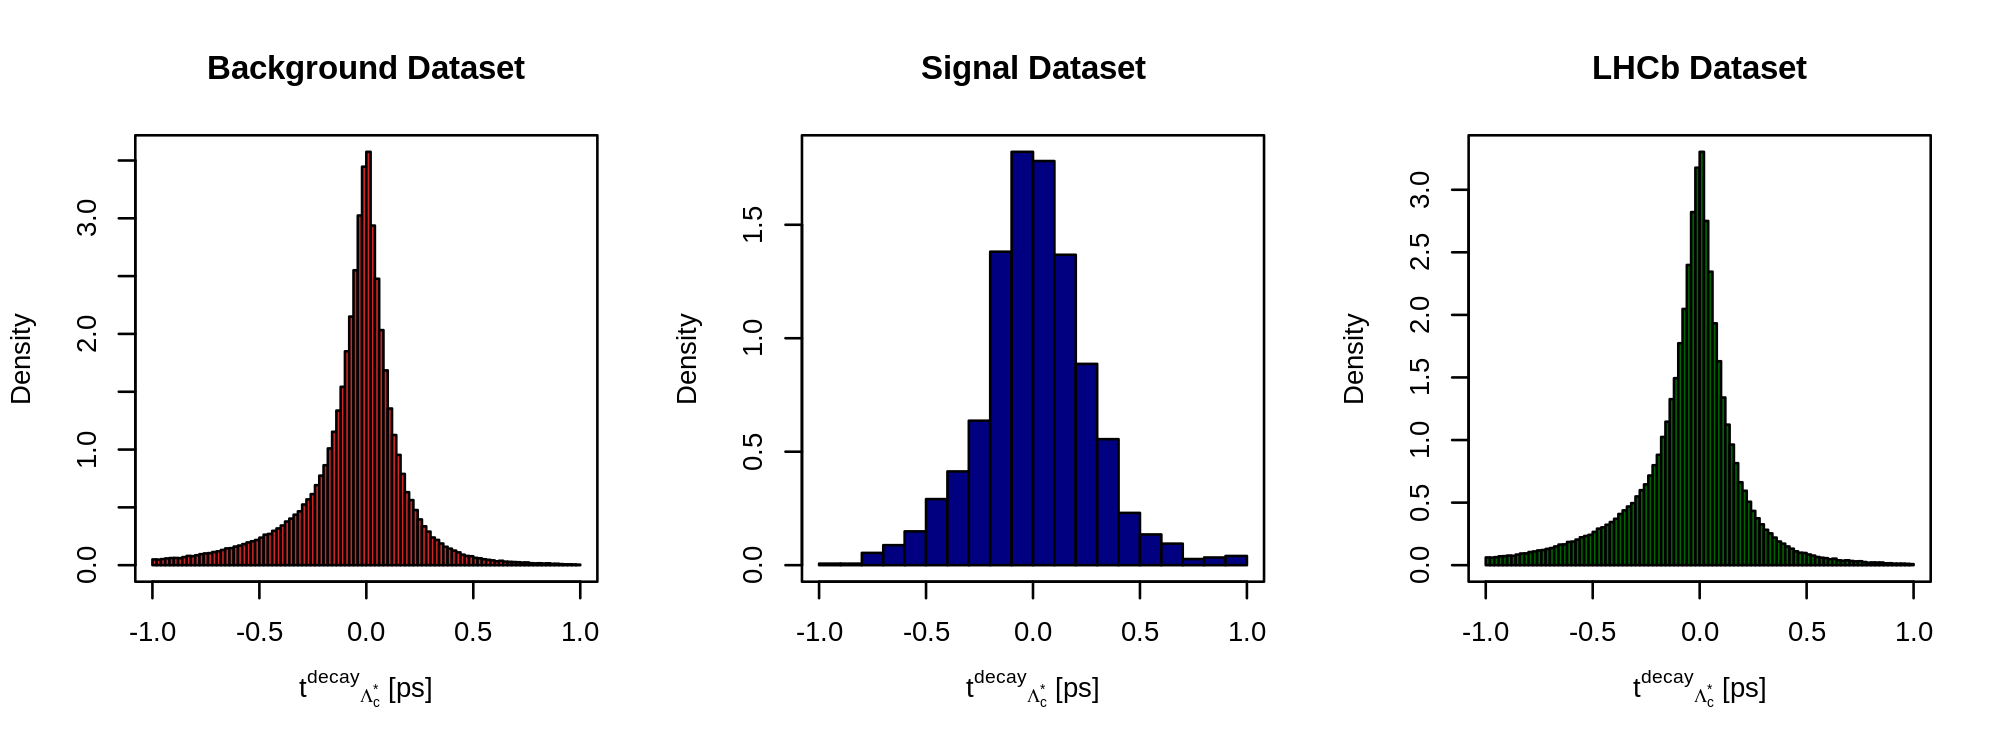

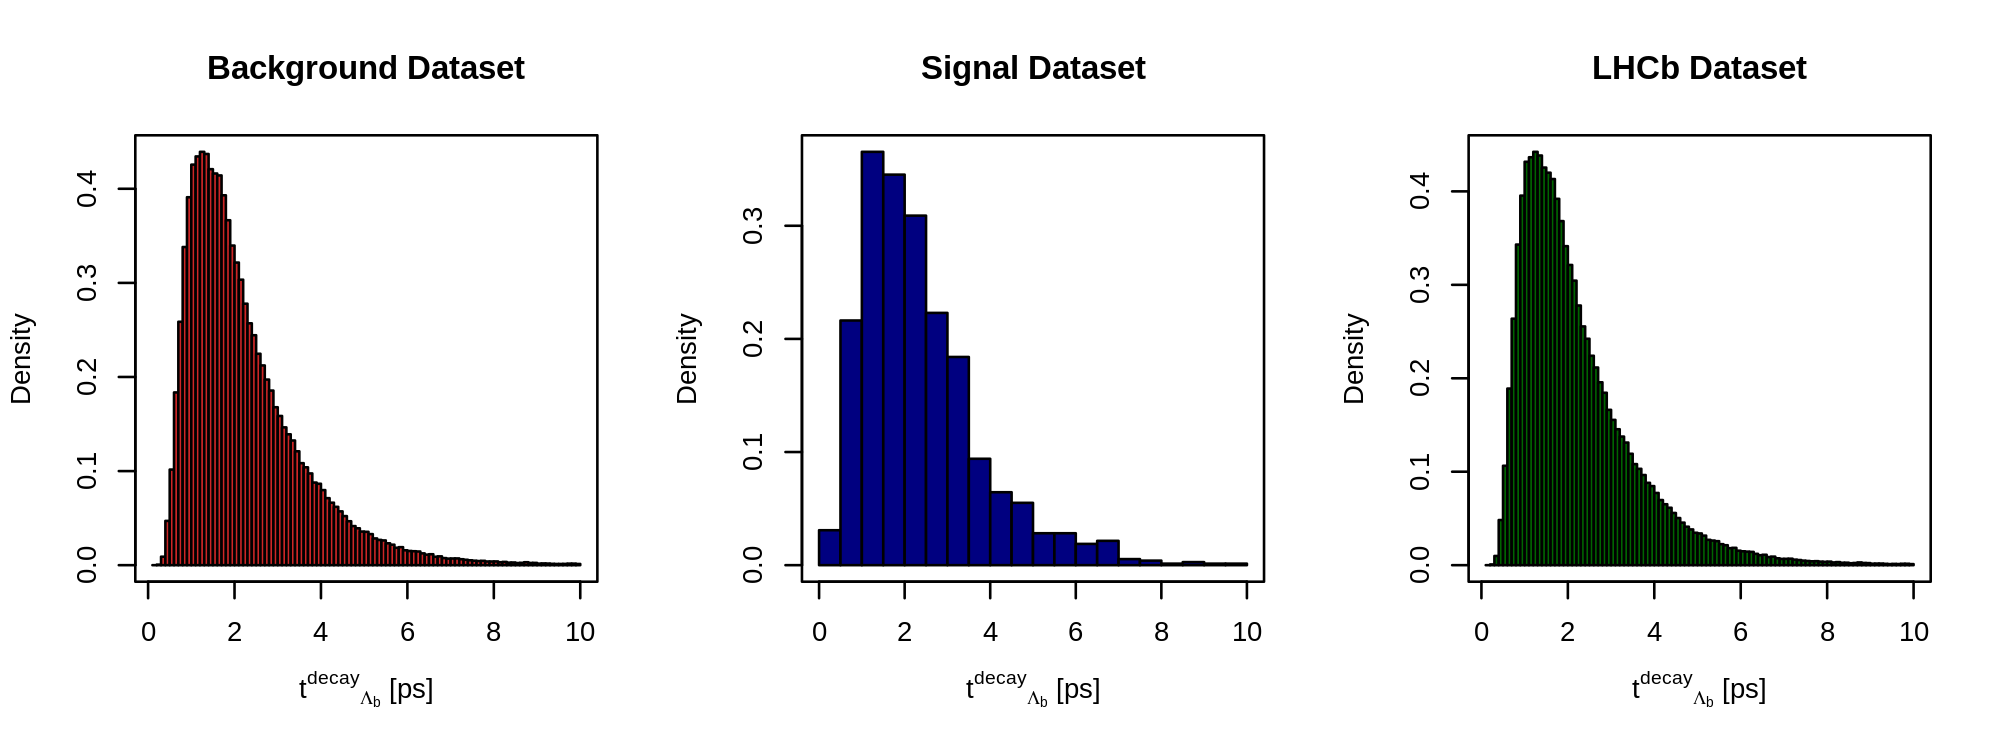

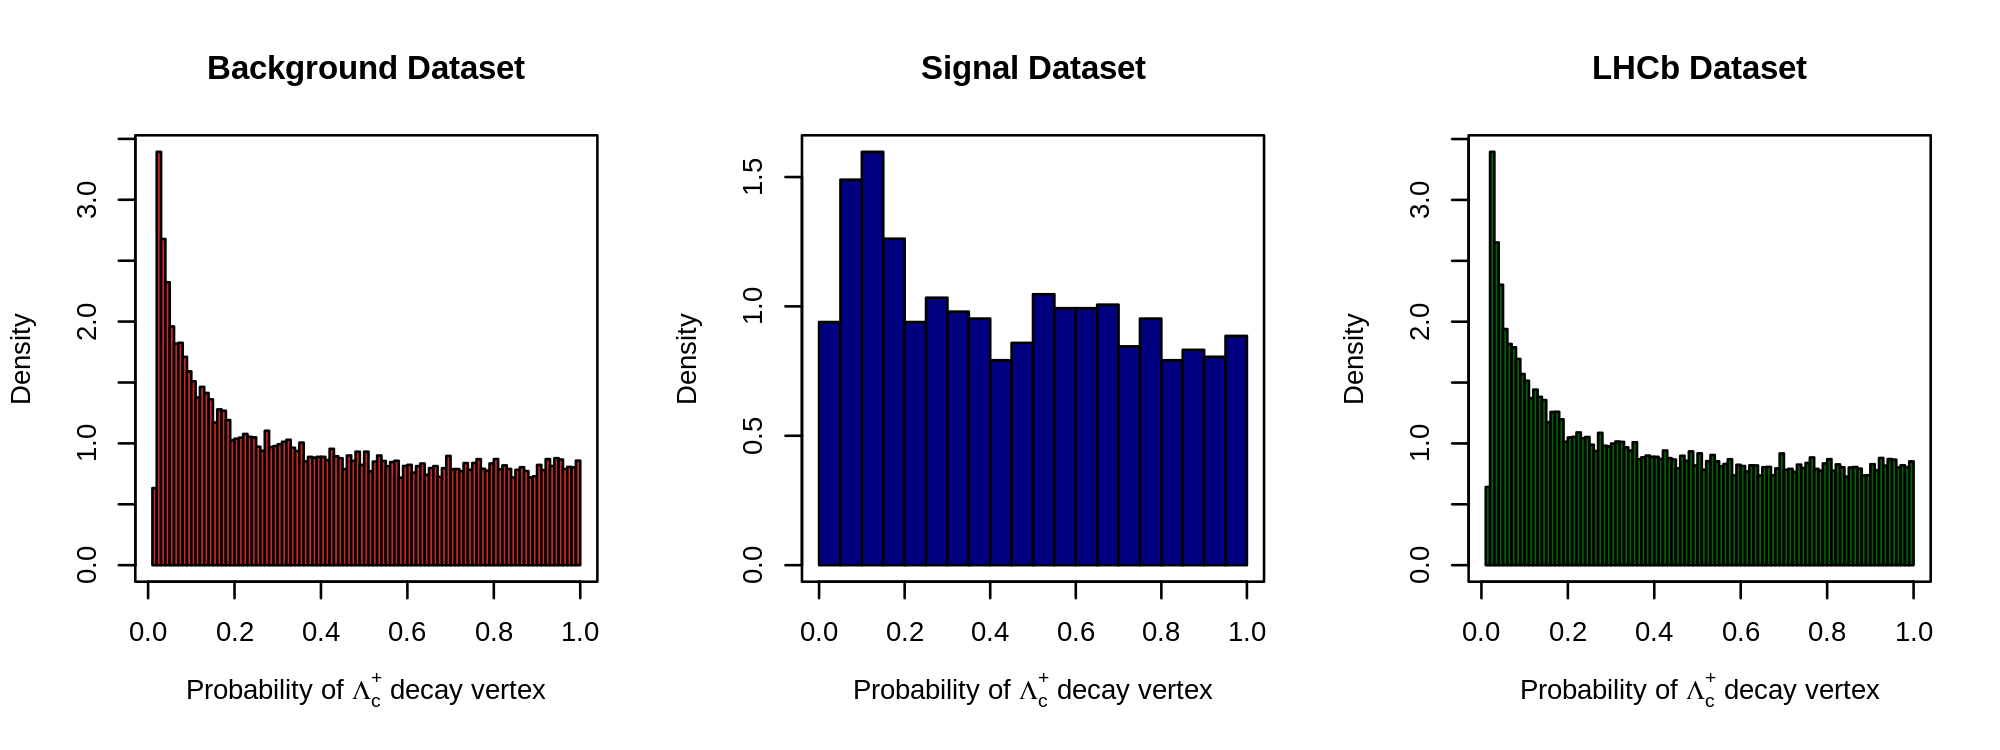

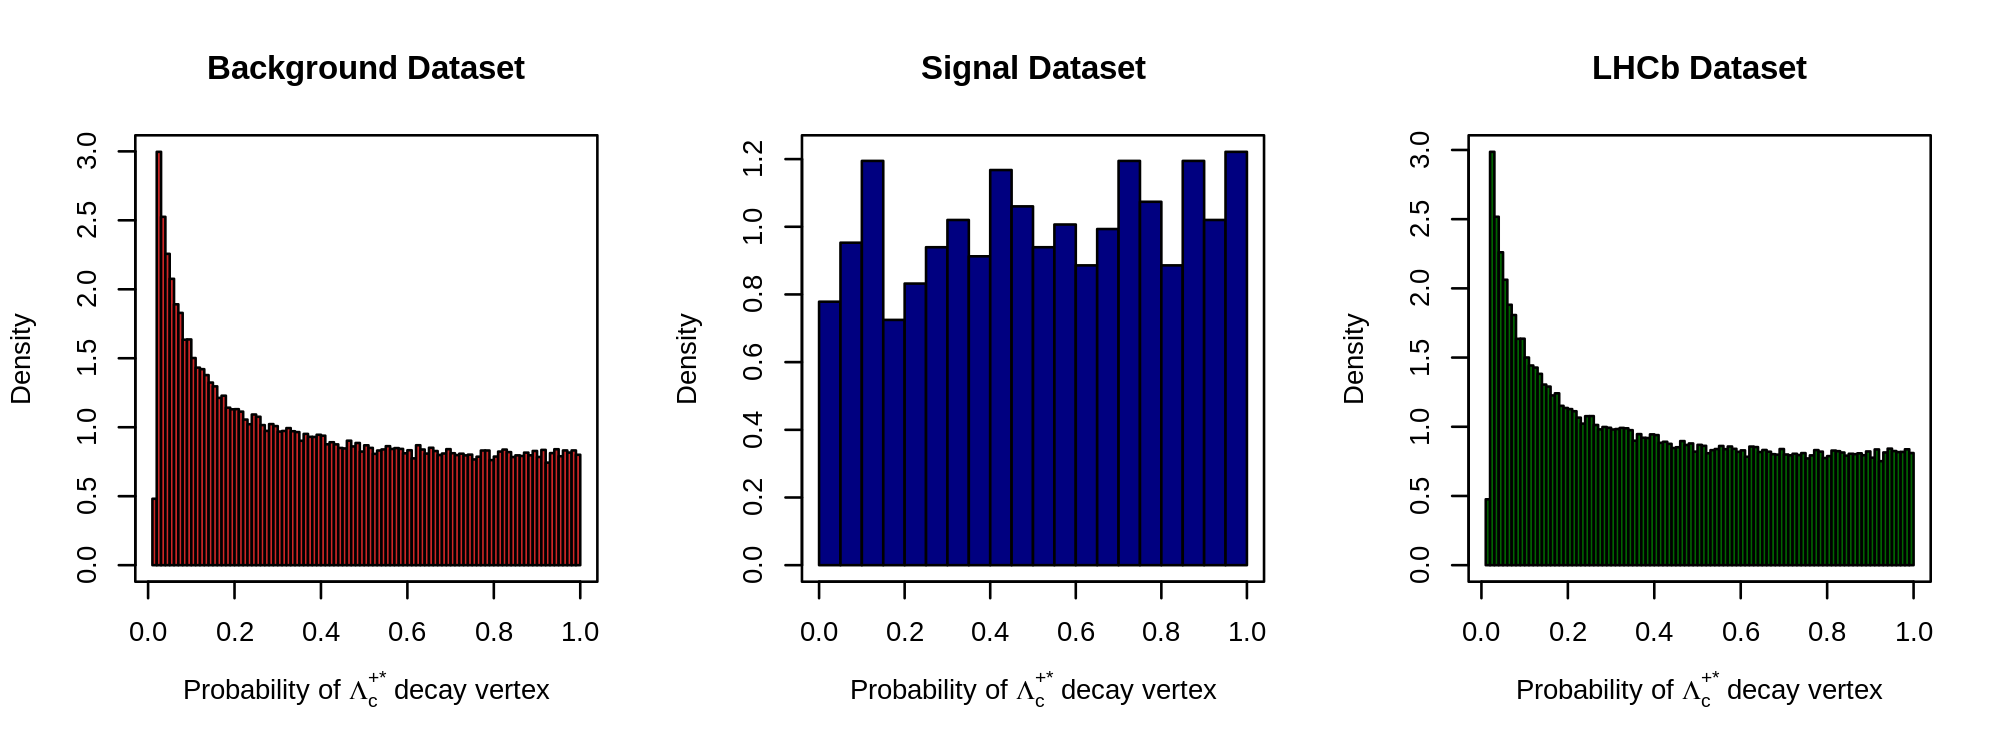

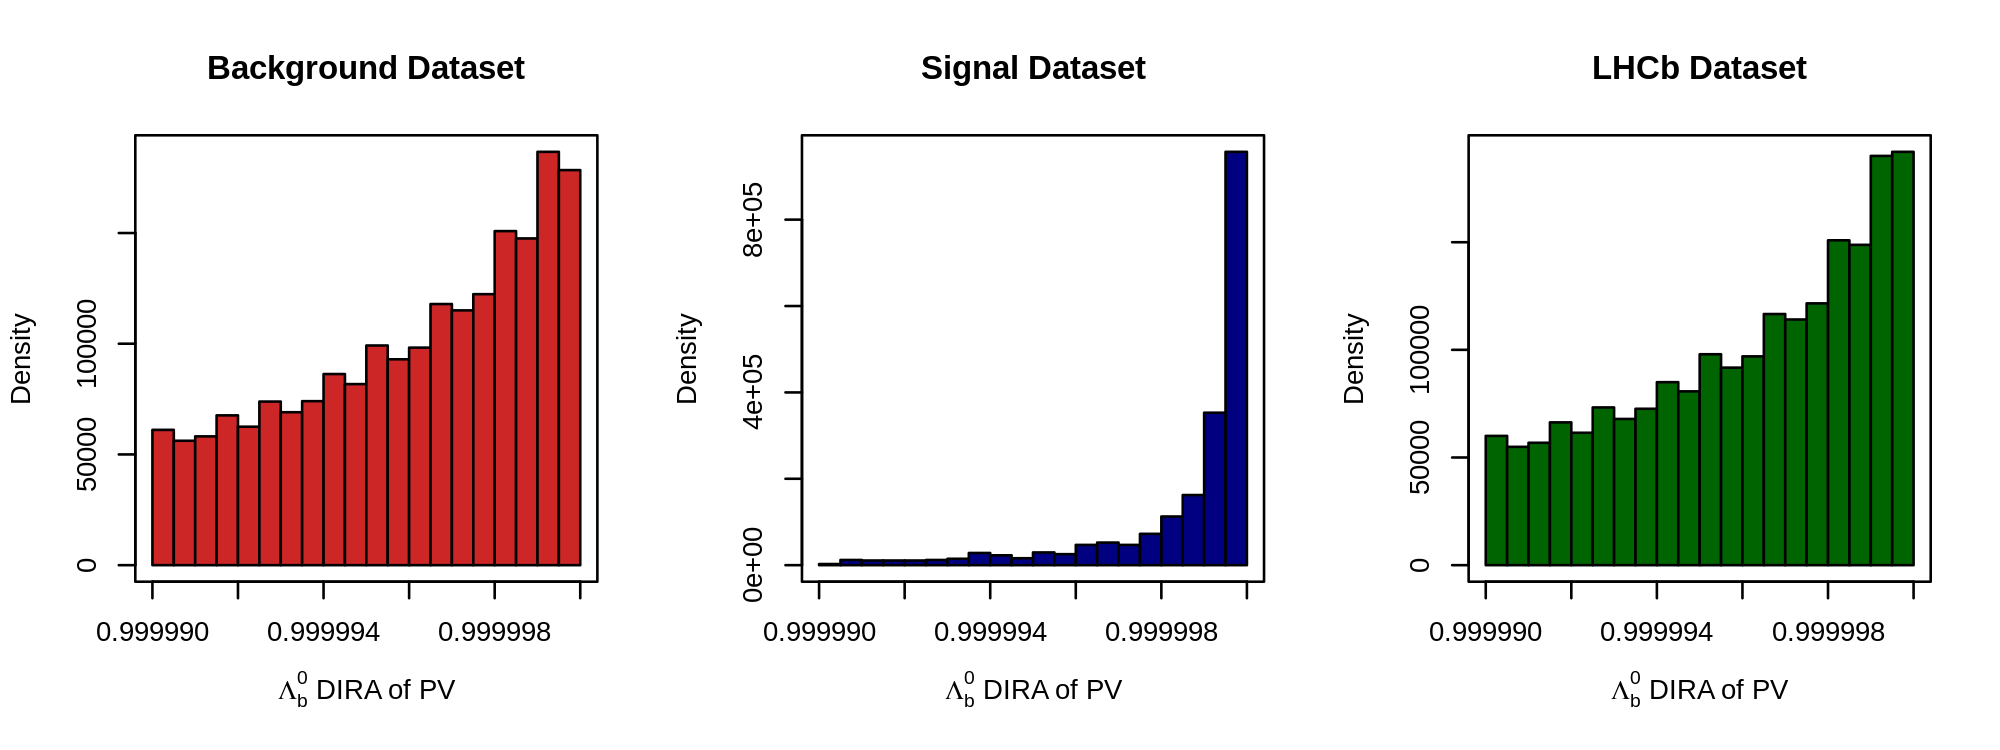

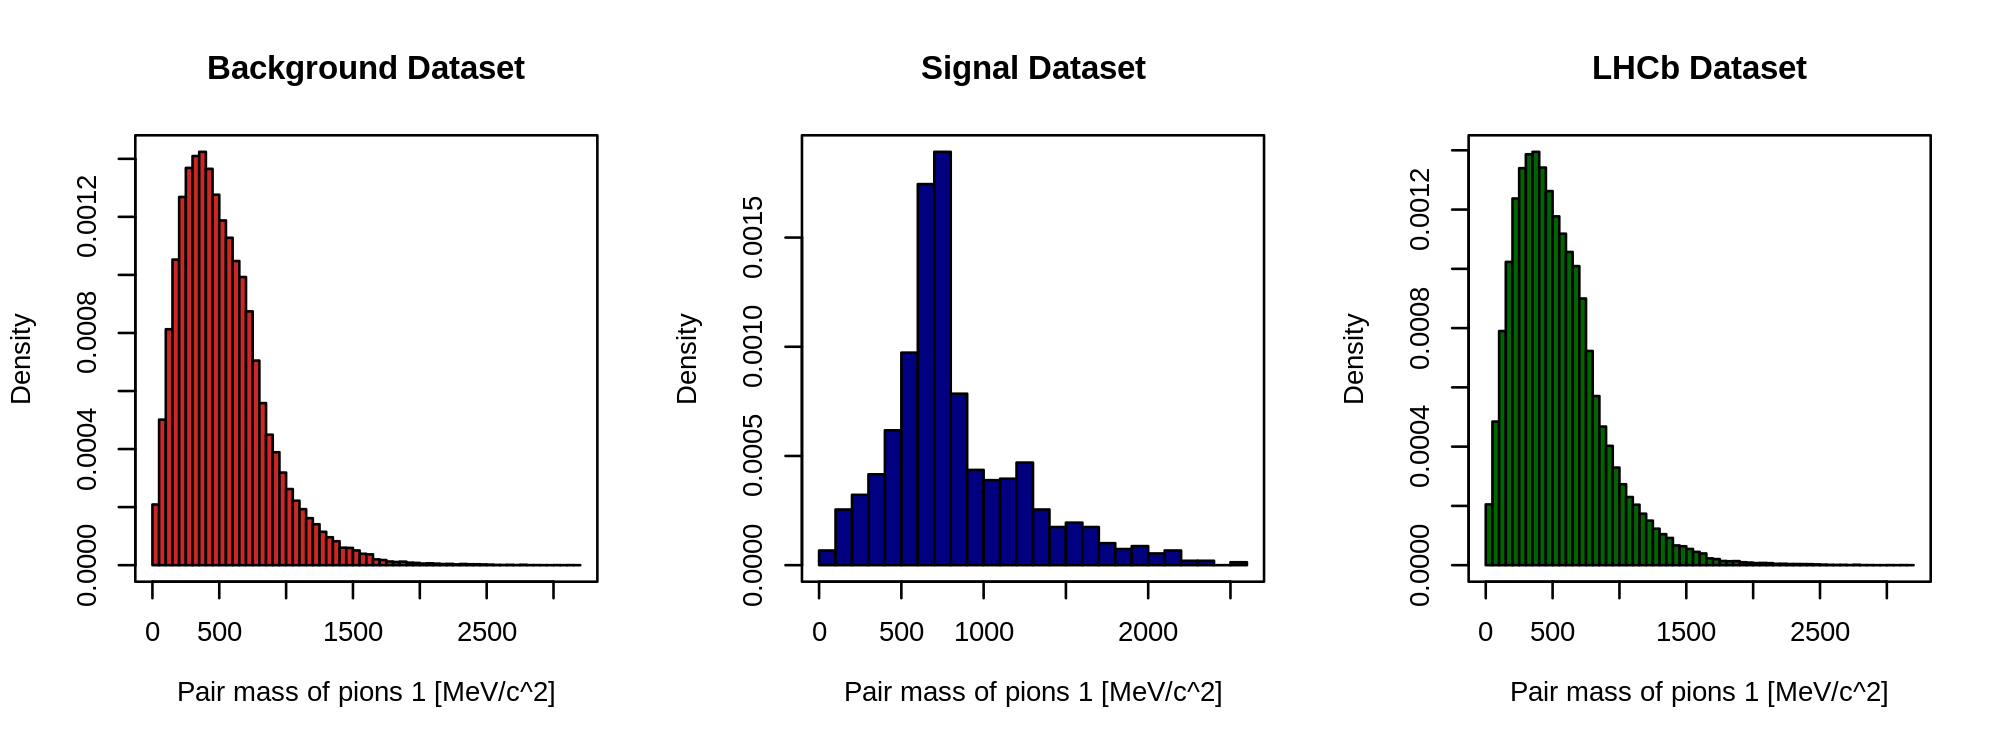

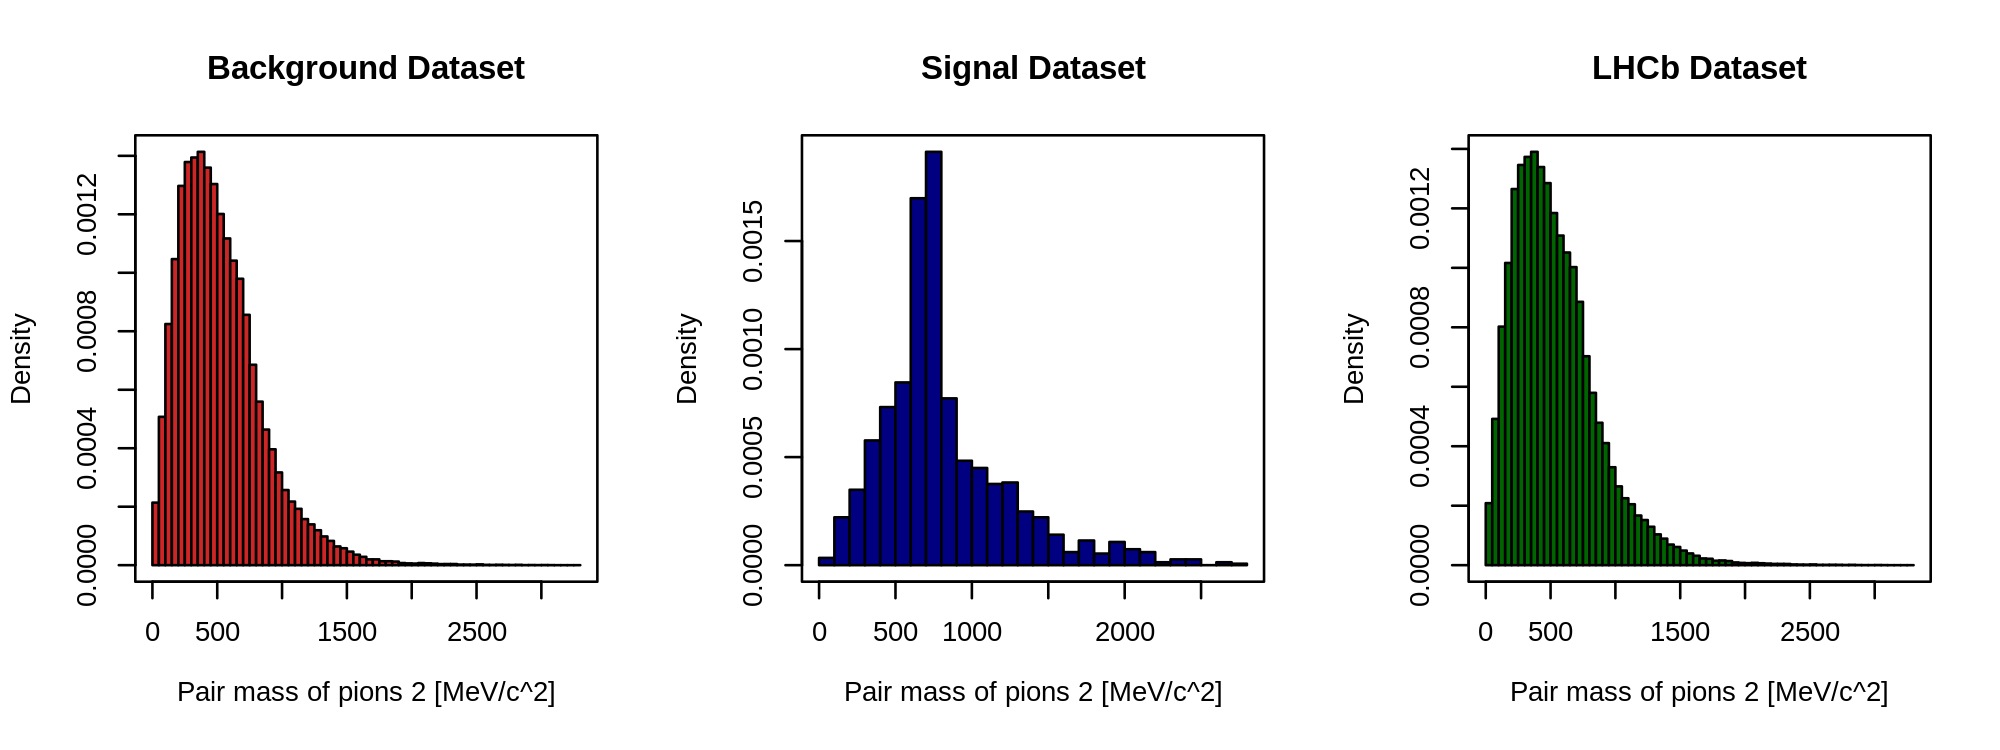

In [8]:
plot_all_input_features(8, 3, 250)

**Features for background reduction**

For this purpose, we employ an user defined function as well (implemented [**here**](https://github.com/mastrovalentz/Adv_Stat_Final_Project/blob/master/code/plot_all_cutting_features.R)).

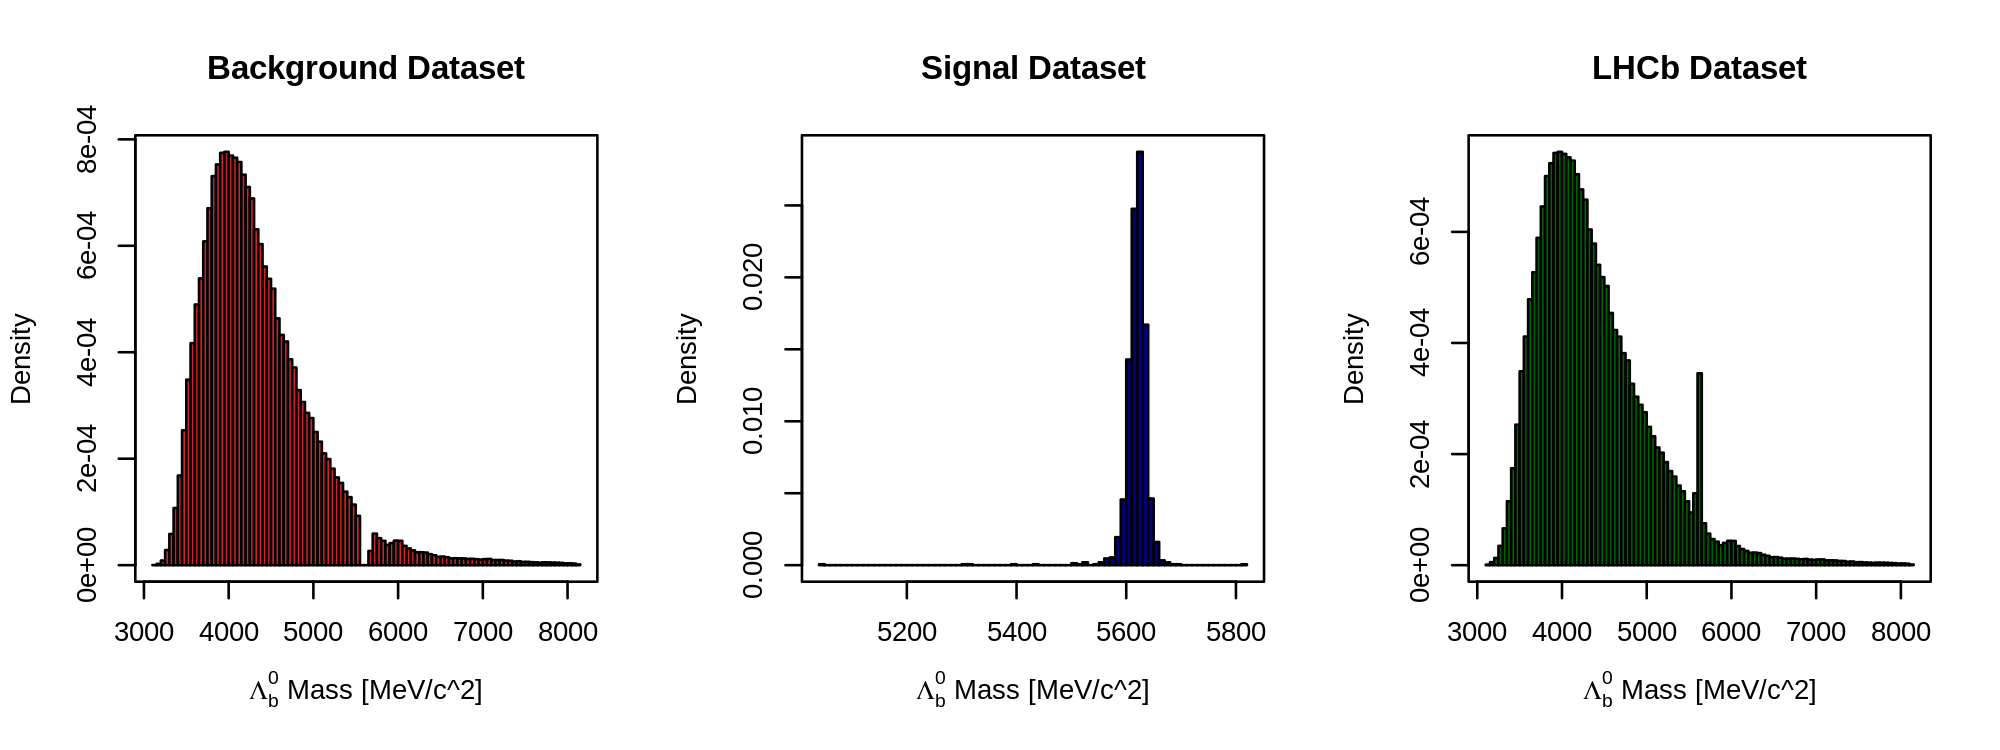

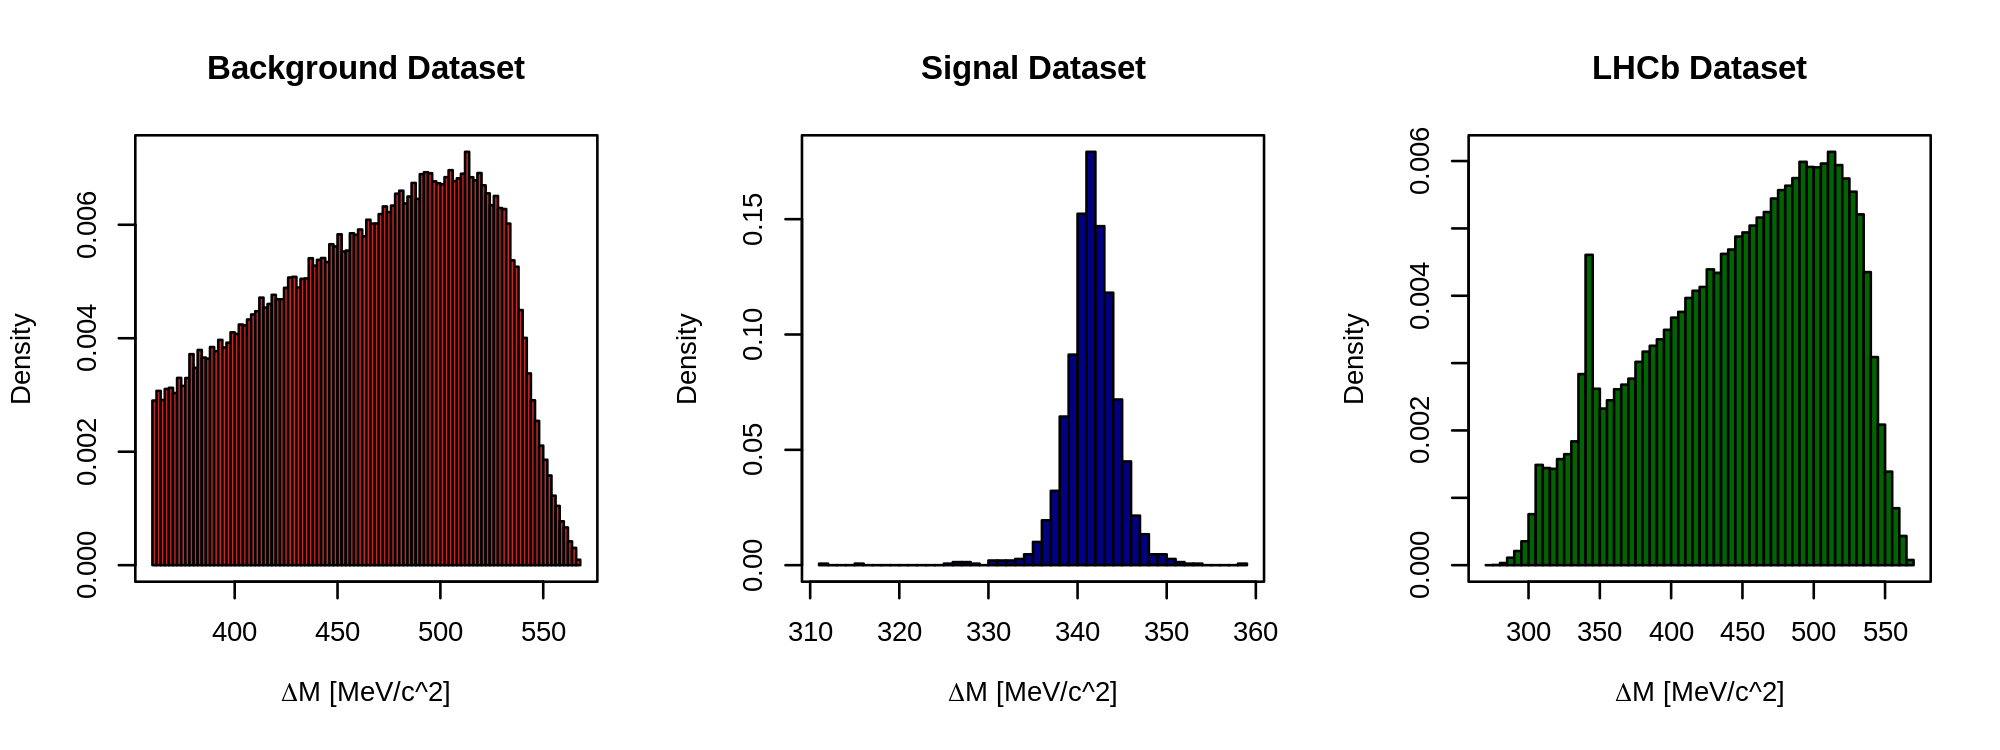

In [9]:
plot_all_cutting_features(8, 3, 250)

<br>
<br>

### 3.3. - Cutted LHCb dataset <a class="anchor" id="AS4PA_FP.3.3."></a>
* [Index](#FP.i)

From the cut of the previous subsection, a new filtered LHCb dataset can be obtained.

In [10]:
data.cutted.lhcb <- data.lhcb[(data.lhcb$Lambda_b0_MM_F>5550 & data.lhcb$Lambda_b0_MM_F<5680) | data.lhcb$DeltaM_F < 360,]

In [11]:
cat("Cutted Dataset: LHCb -> data.frame", dim(data.cutted.lhcb)[1], "x", dim(data.cutted.lhcb)[2], "\n")

Cutted Dataset: LHCb -> data.frame 69592 x 29 


The total number of events in the LHCb dataset is reduced to about ~70000 from the original ~470000. This new dataset is more suitable for testing the performances of the network since the original one contains too much background in region of the spectrum where no signal is expected. In the following figures, we show this new dataset by plotting the features through which the cut has been performed.

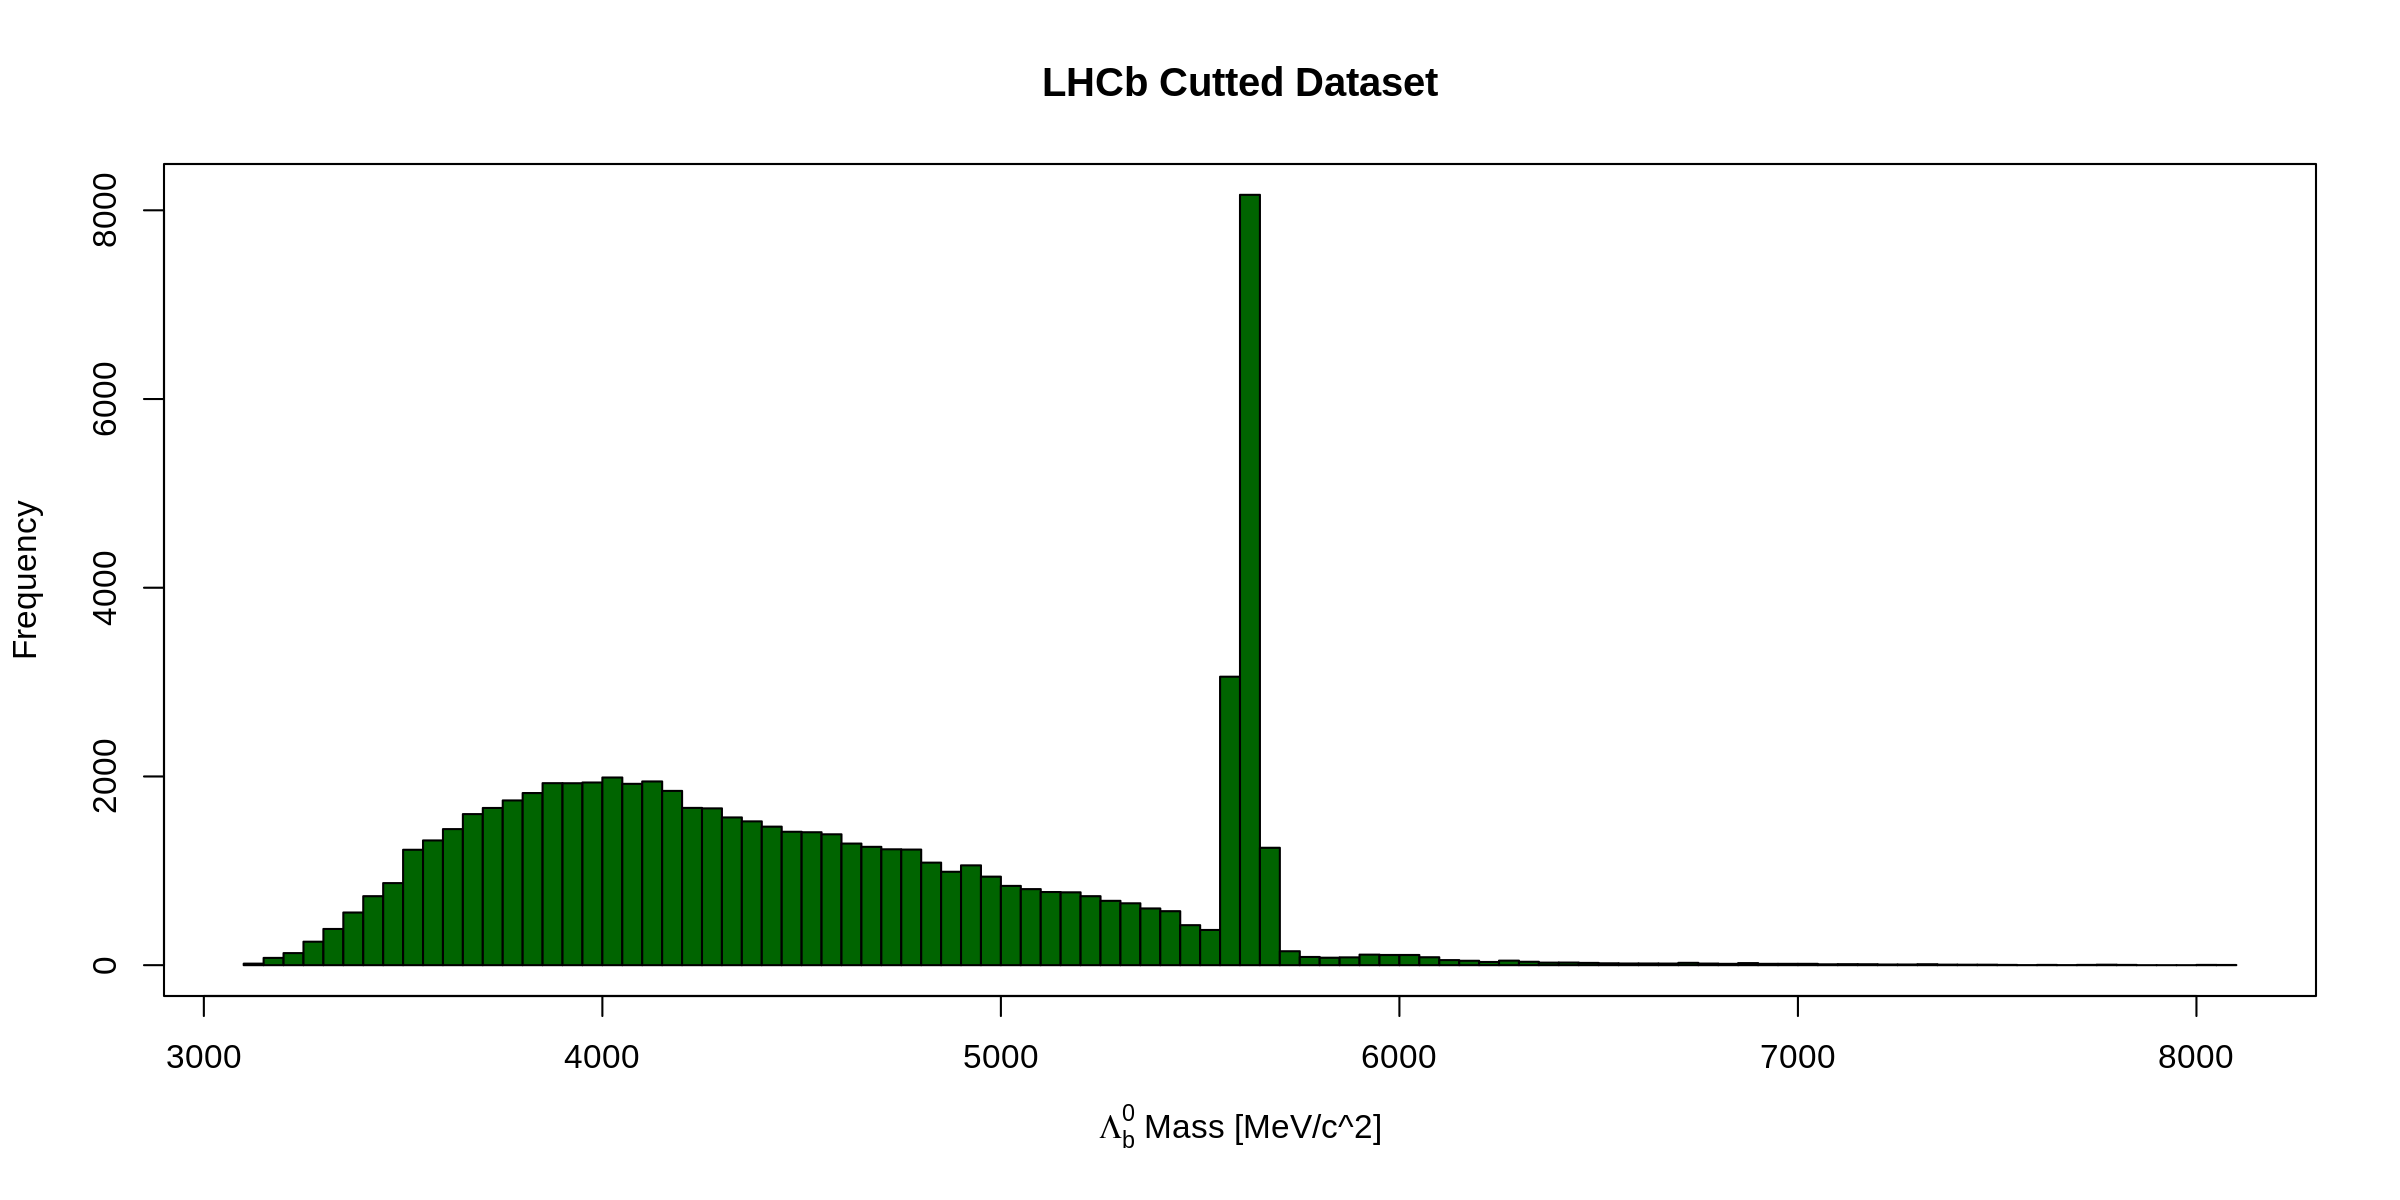

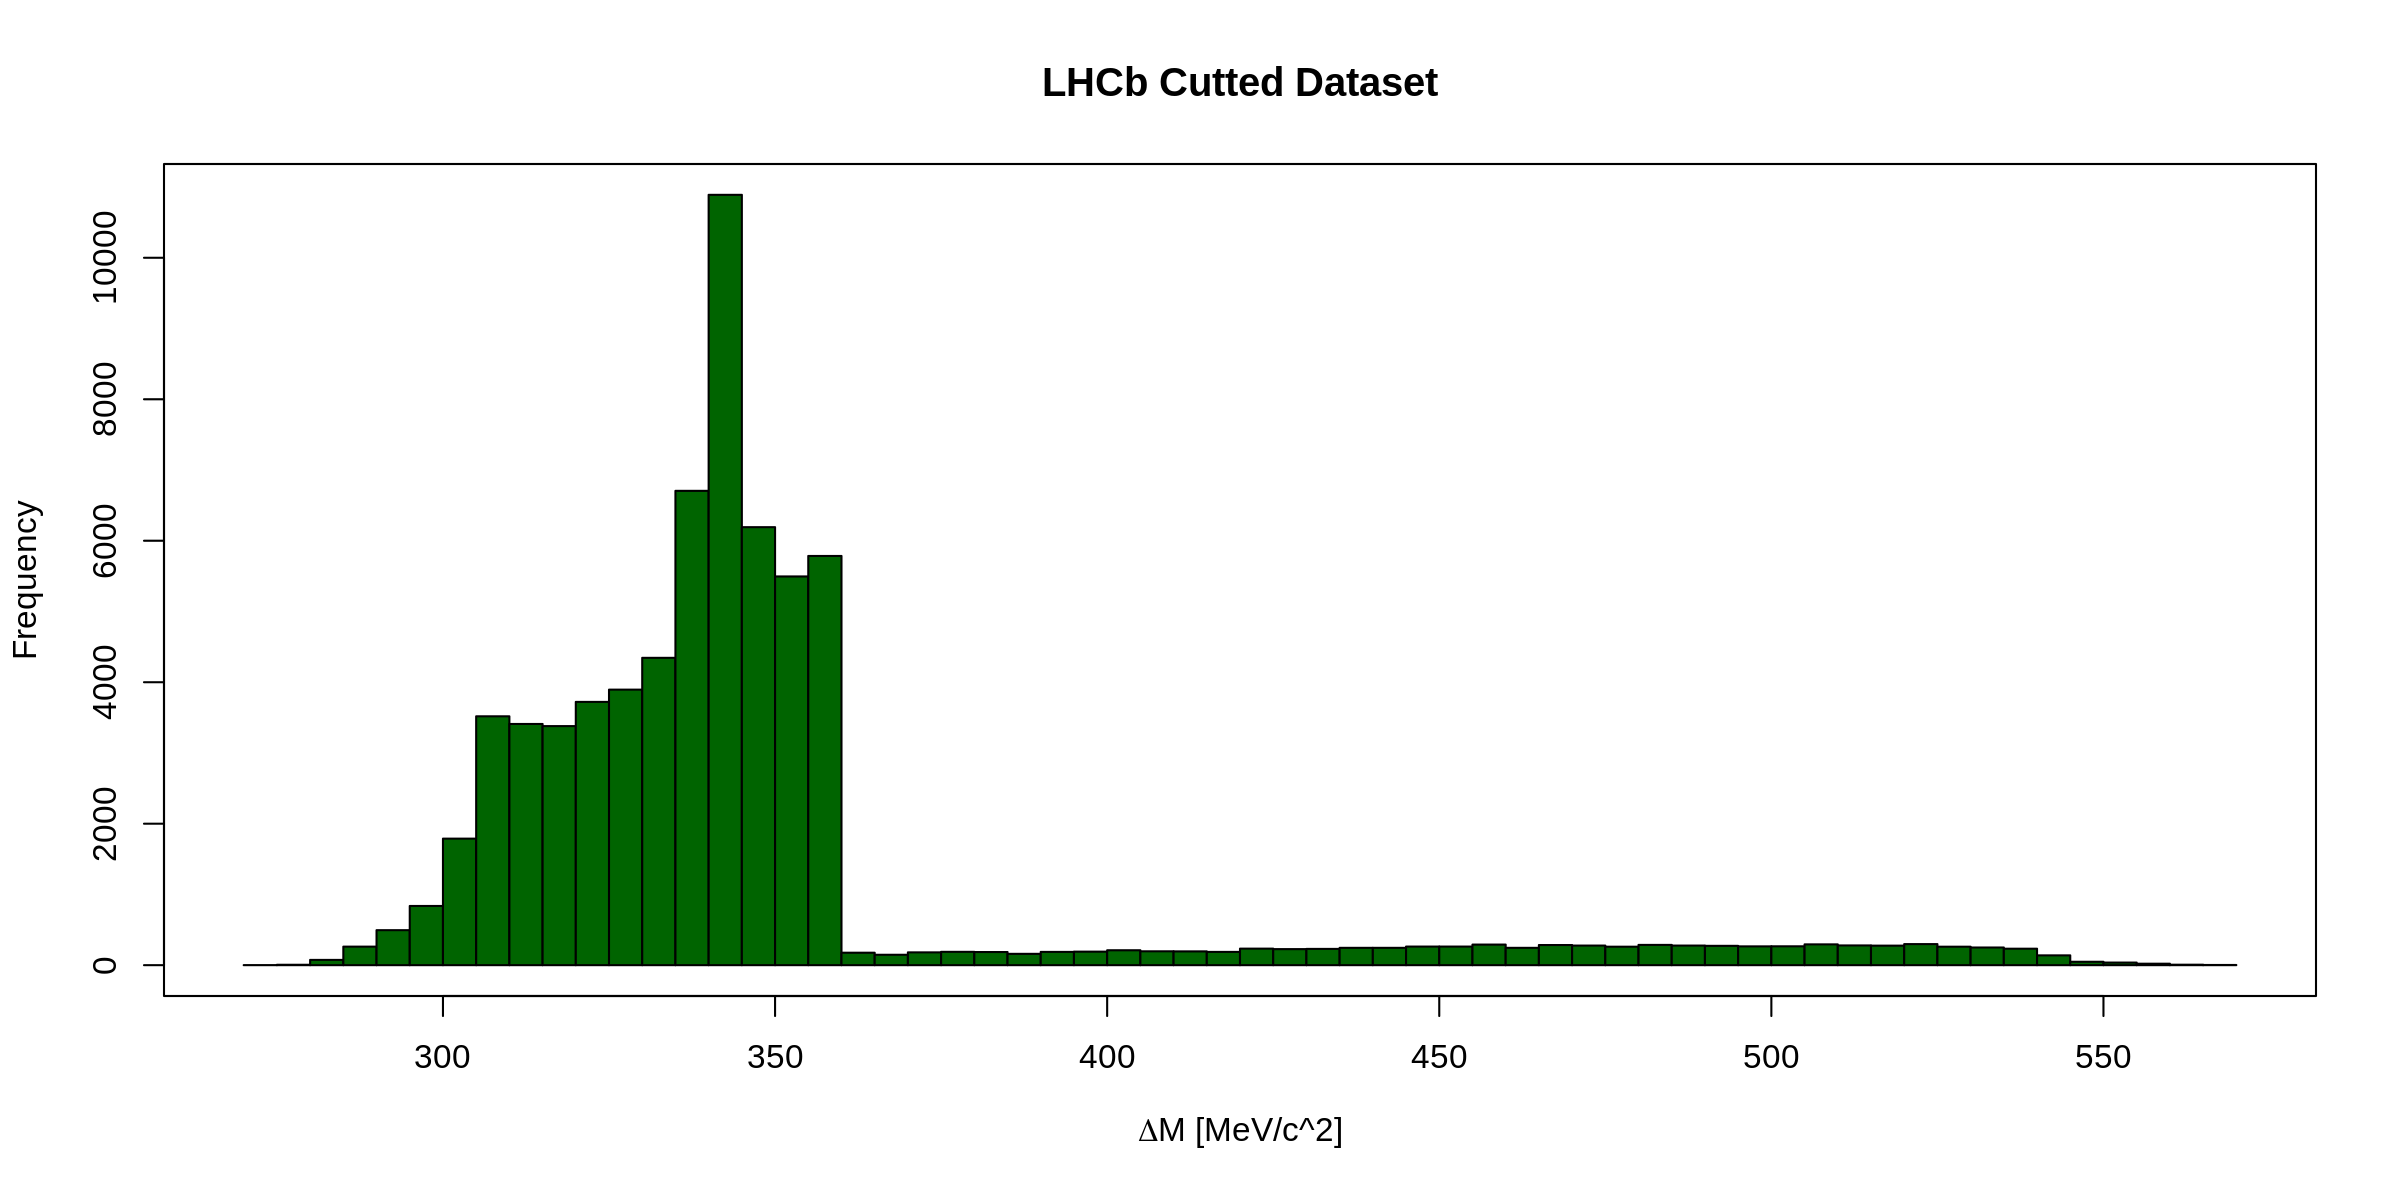

In [12]:
plot_cutted_dataset(12, 6, 200)

<br>
<br>

### 3.4. - Estimation of the number of signal events in LHCb dataset <a class="anchor" id="AS4PA_FP.3.4."></a>
* [Index](#FP.i)

Before moving to the next step of the analysis, it is interesting to give an estimate of the expected number of signal events in LHCb dataset. This calculation will also be useful for the last part of our work, when we will compare the neural network results with the expectation.

An easy way to perform this calculation is focusing on the region of the signal in $\Lambda_b^0$ mass spectrum. If we consider a sufficiently narrow region around the peak, the background distribution is locally described by a linear model. Therefore, we perform a linear fit in this region, excluding the counts in $[5550, 5680] \ \text{MeV/c^2}$. After having modeled the background in the signal region, we subtract the background distribution from the signal+background one and we calculate the remaining counts. The result will be a good approximation of the expected signal events.

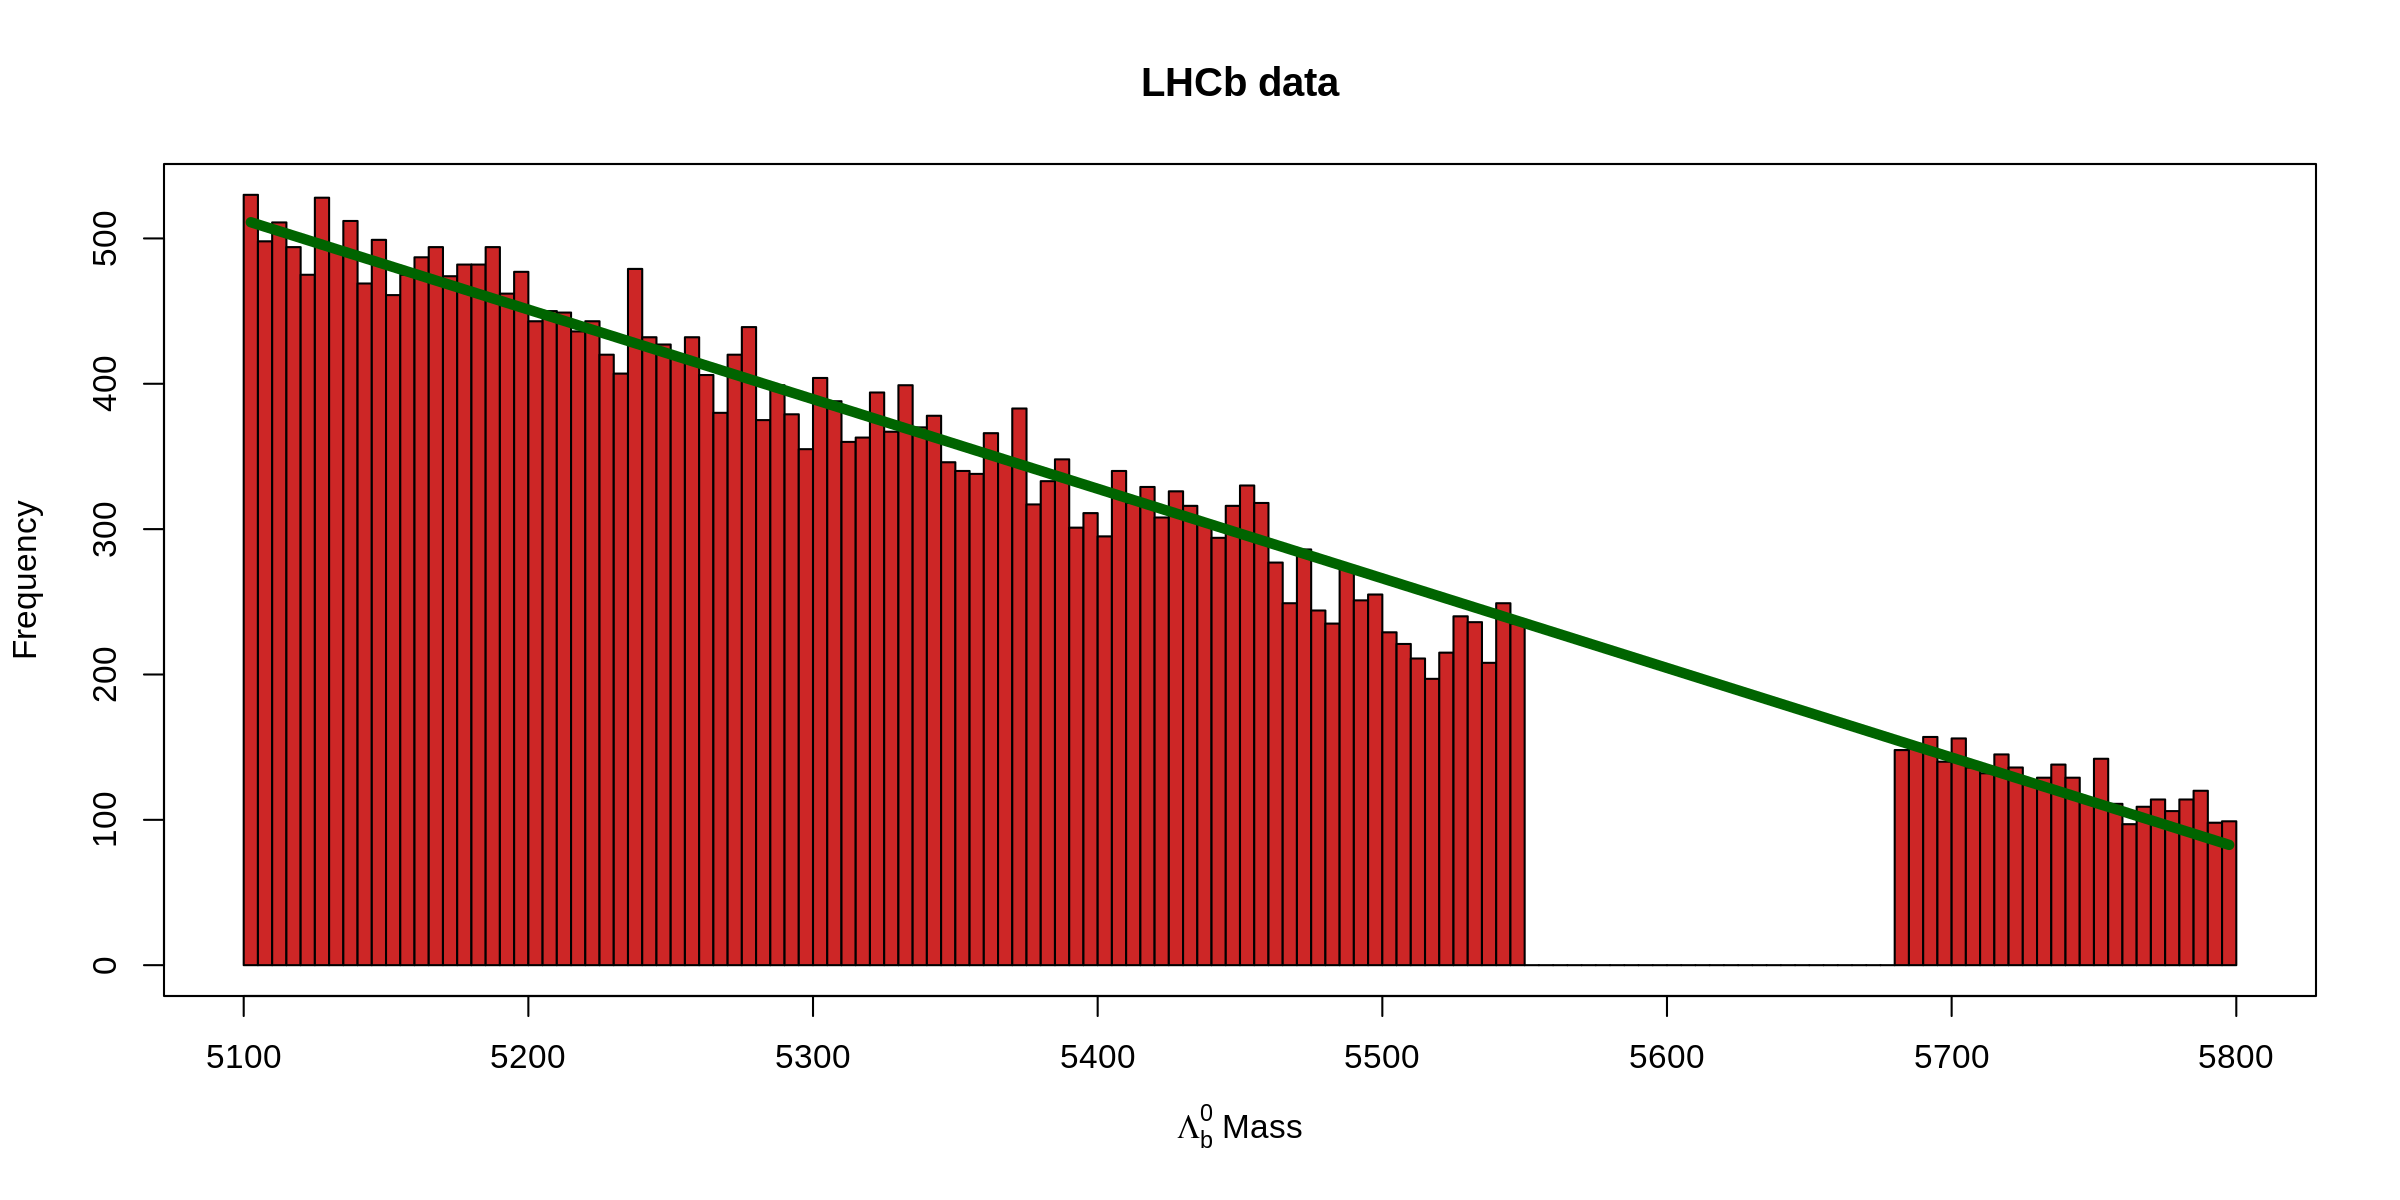

In [13]:
data.lhcb.sig.expected <- plot_signal_estimation(12, 6, 200)

In [14]:
cat("Expected signal events:", data.lhcb.sig.expected, "\n")

Expected signal events: 7330 


A value of **~7330 signal events** is in agreement with the theoretical expectation.
***

<br>
<br>
<br>
<br>
<br>

***
## 4. - Neural Network Model Building and Tuning <a class="anchor" id="AS4PA_FP.4."></a>
* [Index](#FP.i)

In order to build the model, the **```model_build```** function has been exploited. The implementation of the cross validation for grid searches is done in the functions **```cv_tune_builder```** and **```tune_builder```** (implemented [**here**](https://github.com/mastrovalentz/Adv_Stat_Final_Project/blob/master/code/ModelTuner.R)). Here we load them and then we go on with the tuning of the network. Note that we will fix for simplicity the number of the layers of the model at 3+1 (the final layer for prediction).

In [15]:
source("../code/ModelBuilder.R")
source("../code/ModelTuner.R")
source("../code/ModelParameters.R")
source("../code/plotPrediction.R")
source("../code/makeDataSet.R")

<br>
<br>

### 4.1. - Dataset fraction for training <a class="anchor" id="AS4PA_FP.4.1."></a>
* [Index](#FP.i)

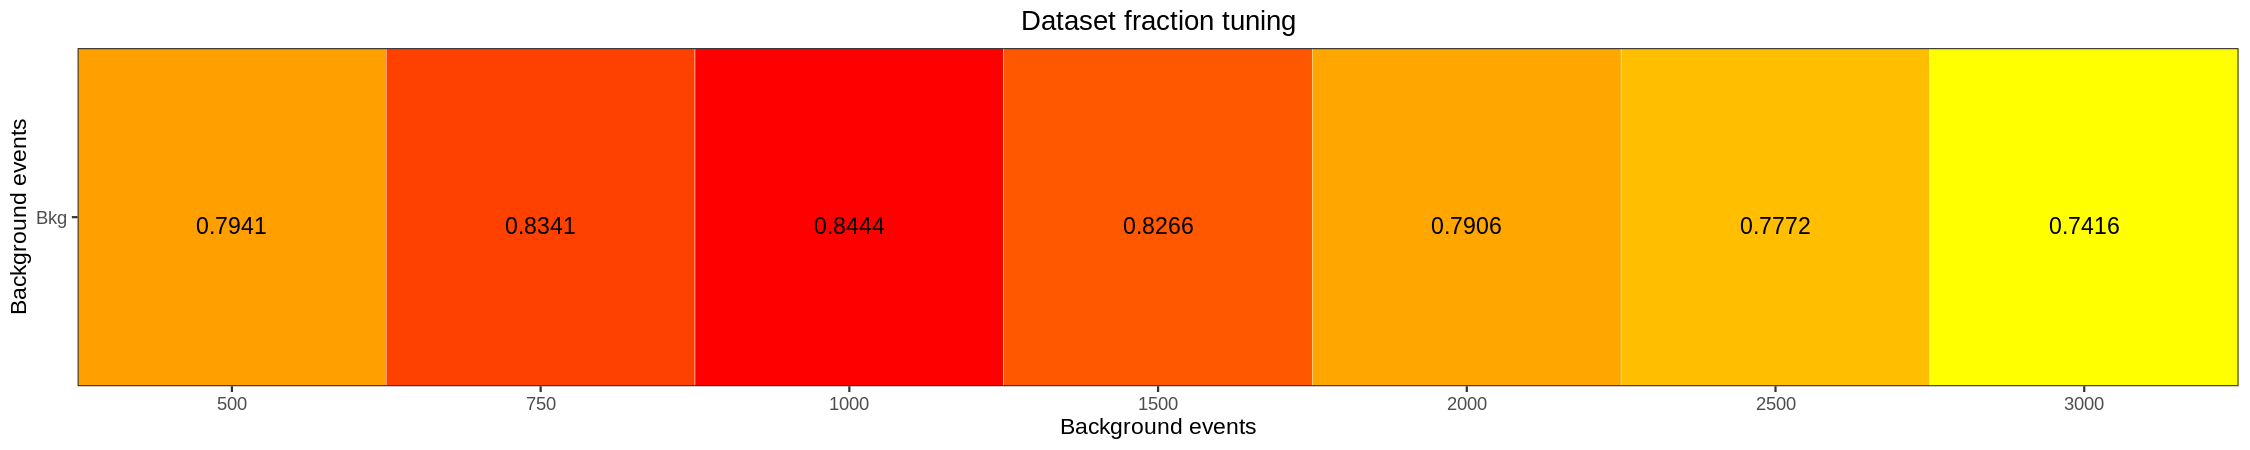

In [16]:
file.txt <- c("../Tuner_Results/Bkg_Num/Grid_Bkg_Finer.txt")
plot_dataset_grid(file.txt, 15, 3, 150)

**Best result:**
* **background training events: `1000`**.

<br>
<br>

### 4.2. - Batch size and number of epochs <a class="anchor" id="AS4PA_FP.4.2."></a>
* [Index](#FP.i)

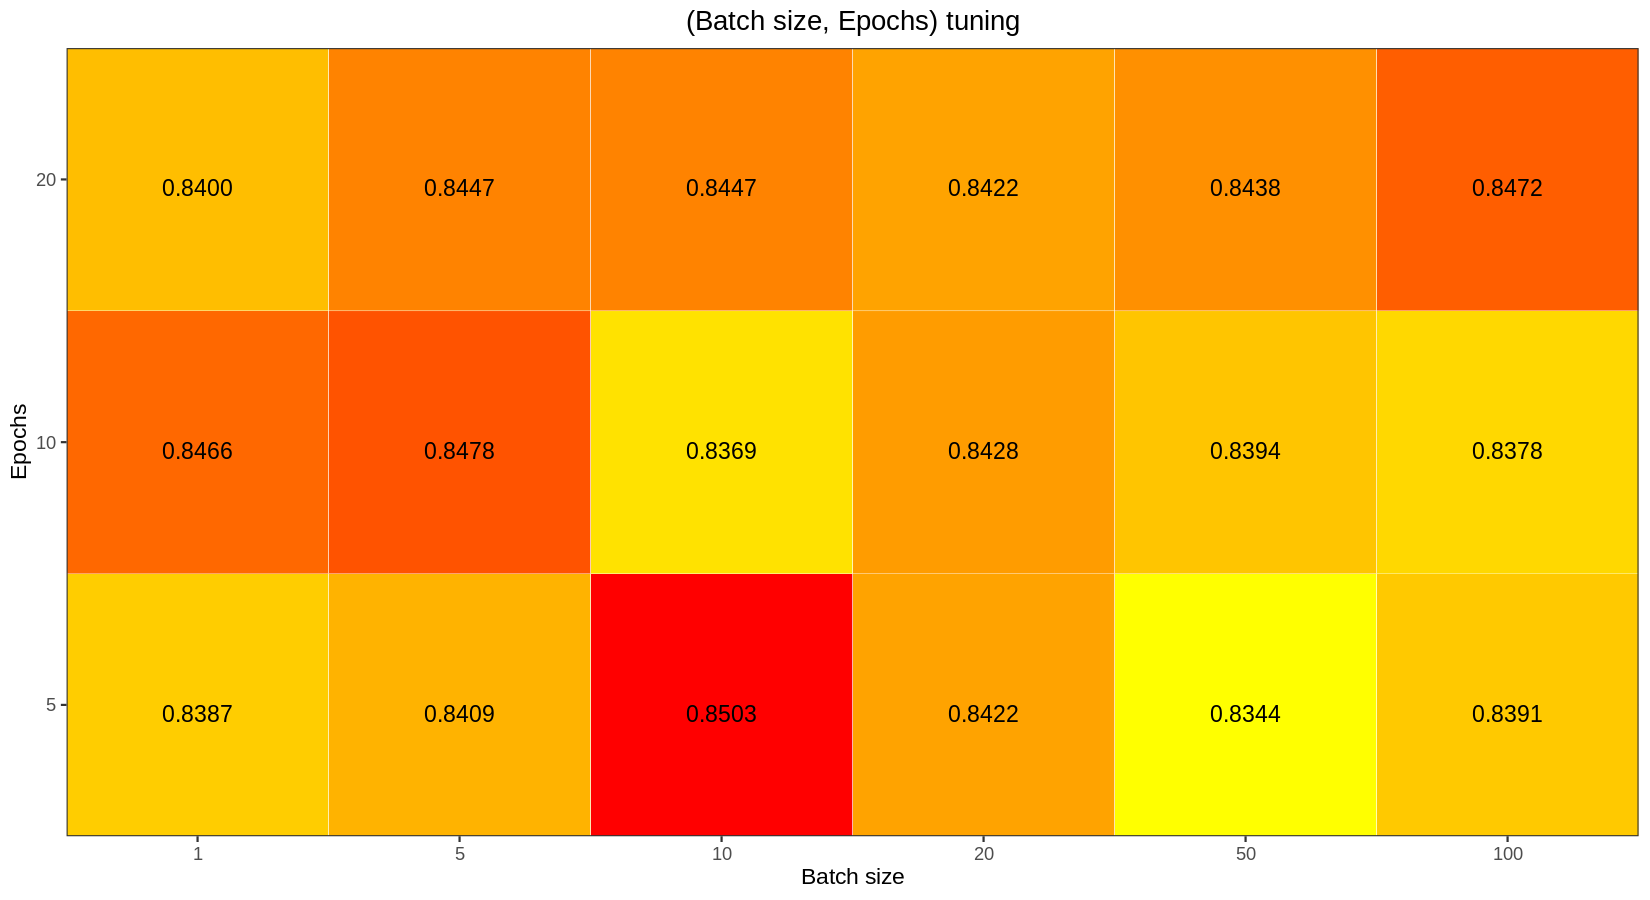

In [17]:
file.txt <- c("../Tuner_Results/Batch_Epochs/Grid_Batch_Epochs.txt")
plot_batch_epochs_grid(file.txt, 11, 6, 150)

**Best result:**
* **batch size: `10`**;
* **number of epochs: `5`**.

<br>
<br>

### 4.3. - Number of neurons per layer <a class="anchor" id="AS4PA_FP.4.3."></a>
* [Index](#FP.i)

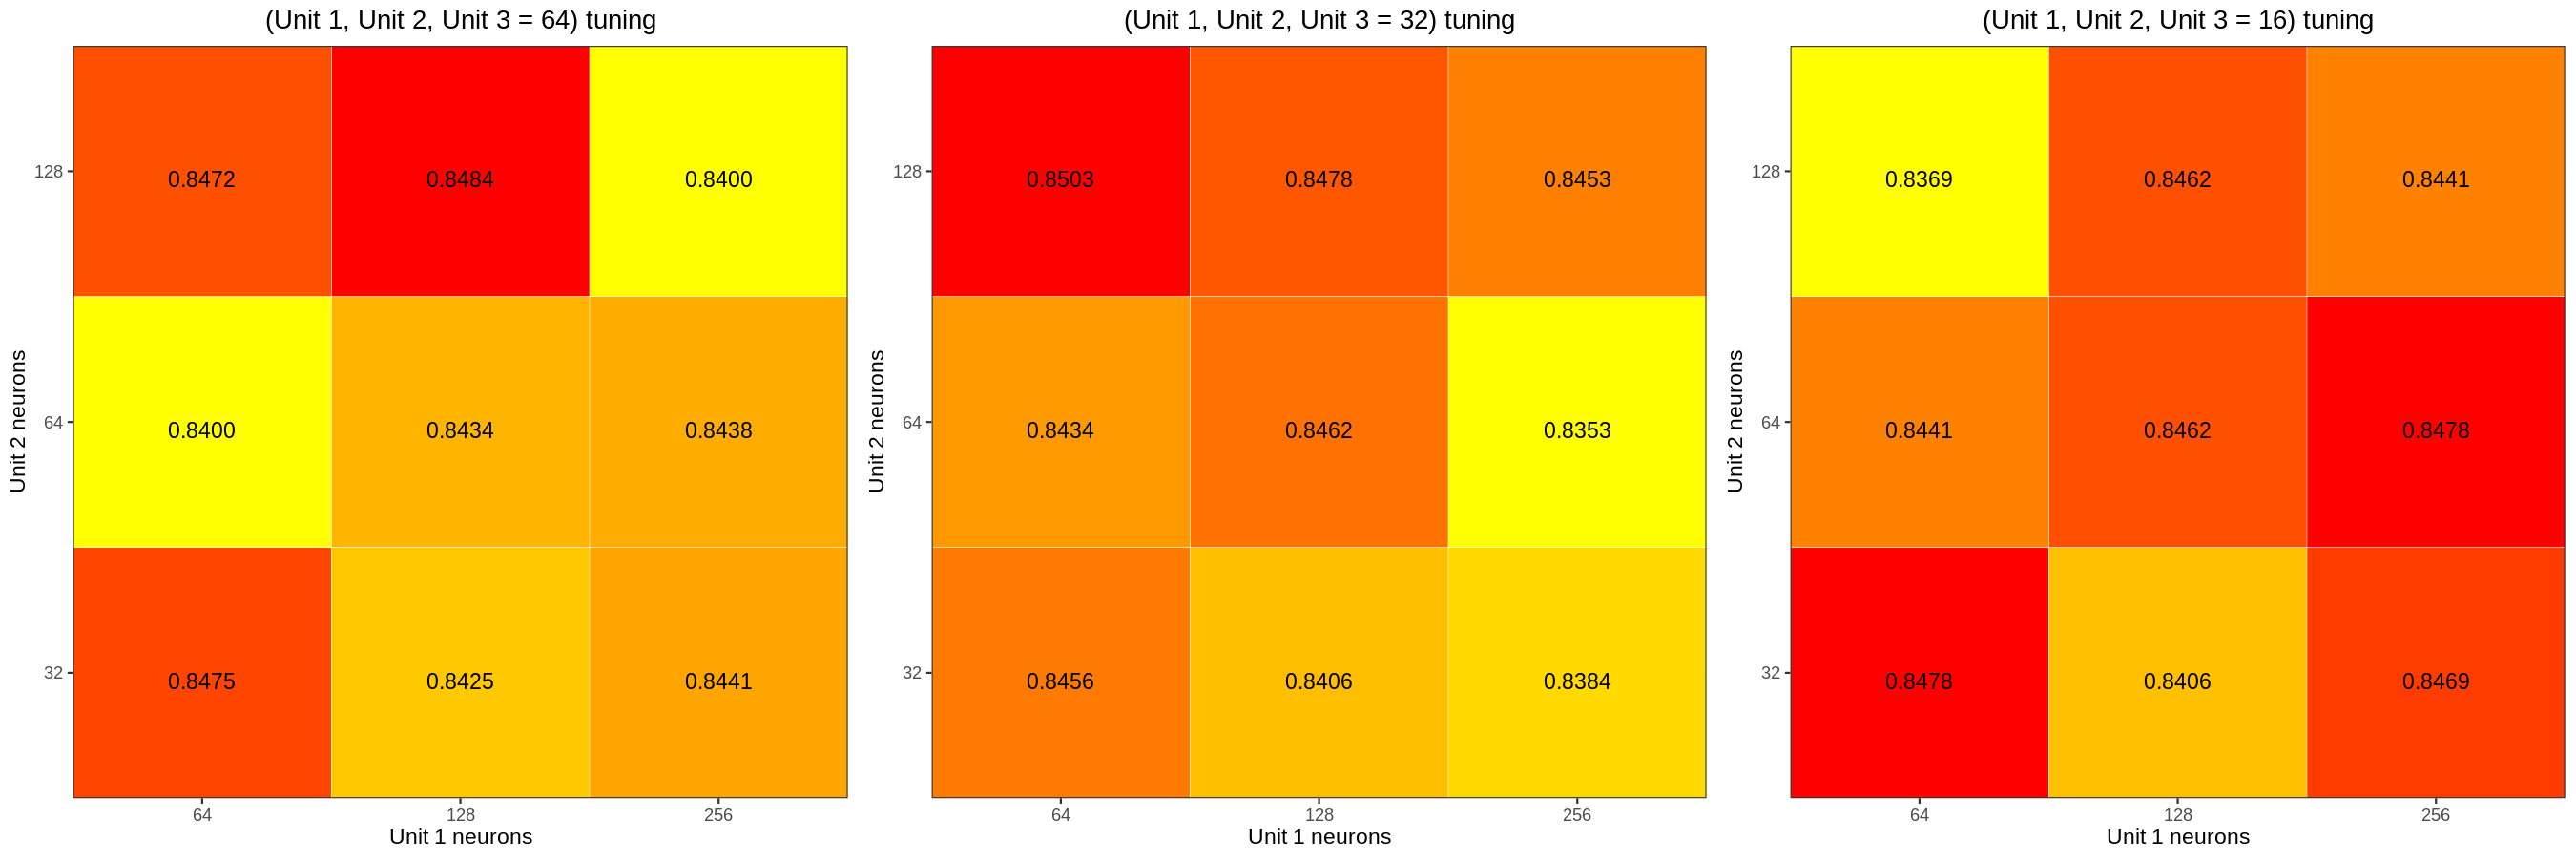

In [18]:
file.txt <- c("../Tuner_Results/Units/Units_Unit3_64.txt", 
              "../Tuner_Results/Units/Units_Unit3_32.txt", 
              "../Tuner_Results/Units/Units_Unit3_16.txt")
plot_unit_grid(file.txt, 18, 6, 150)

**Best result:**
* **layer 1 neurons: ` 64`**;
* **layer 2 neurons: `128`**;
* **layer 3 neurons: ` 32`**.

<br>
<br>

### 4.4. - Dropout rate per layer <a class="anchor" id="AS4PA_FP.4.4."></a>
* [Index](#FP.i)

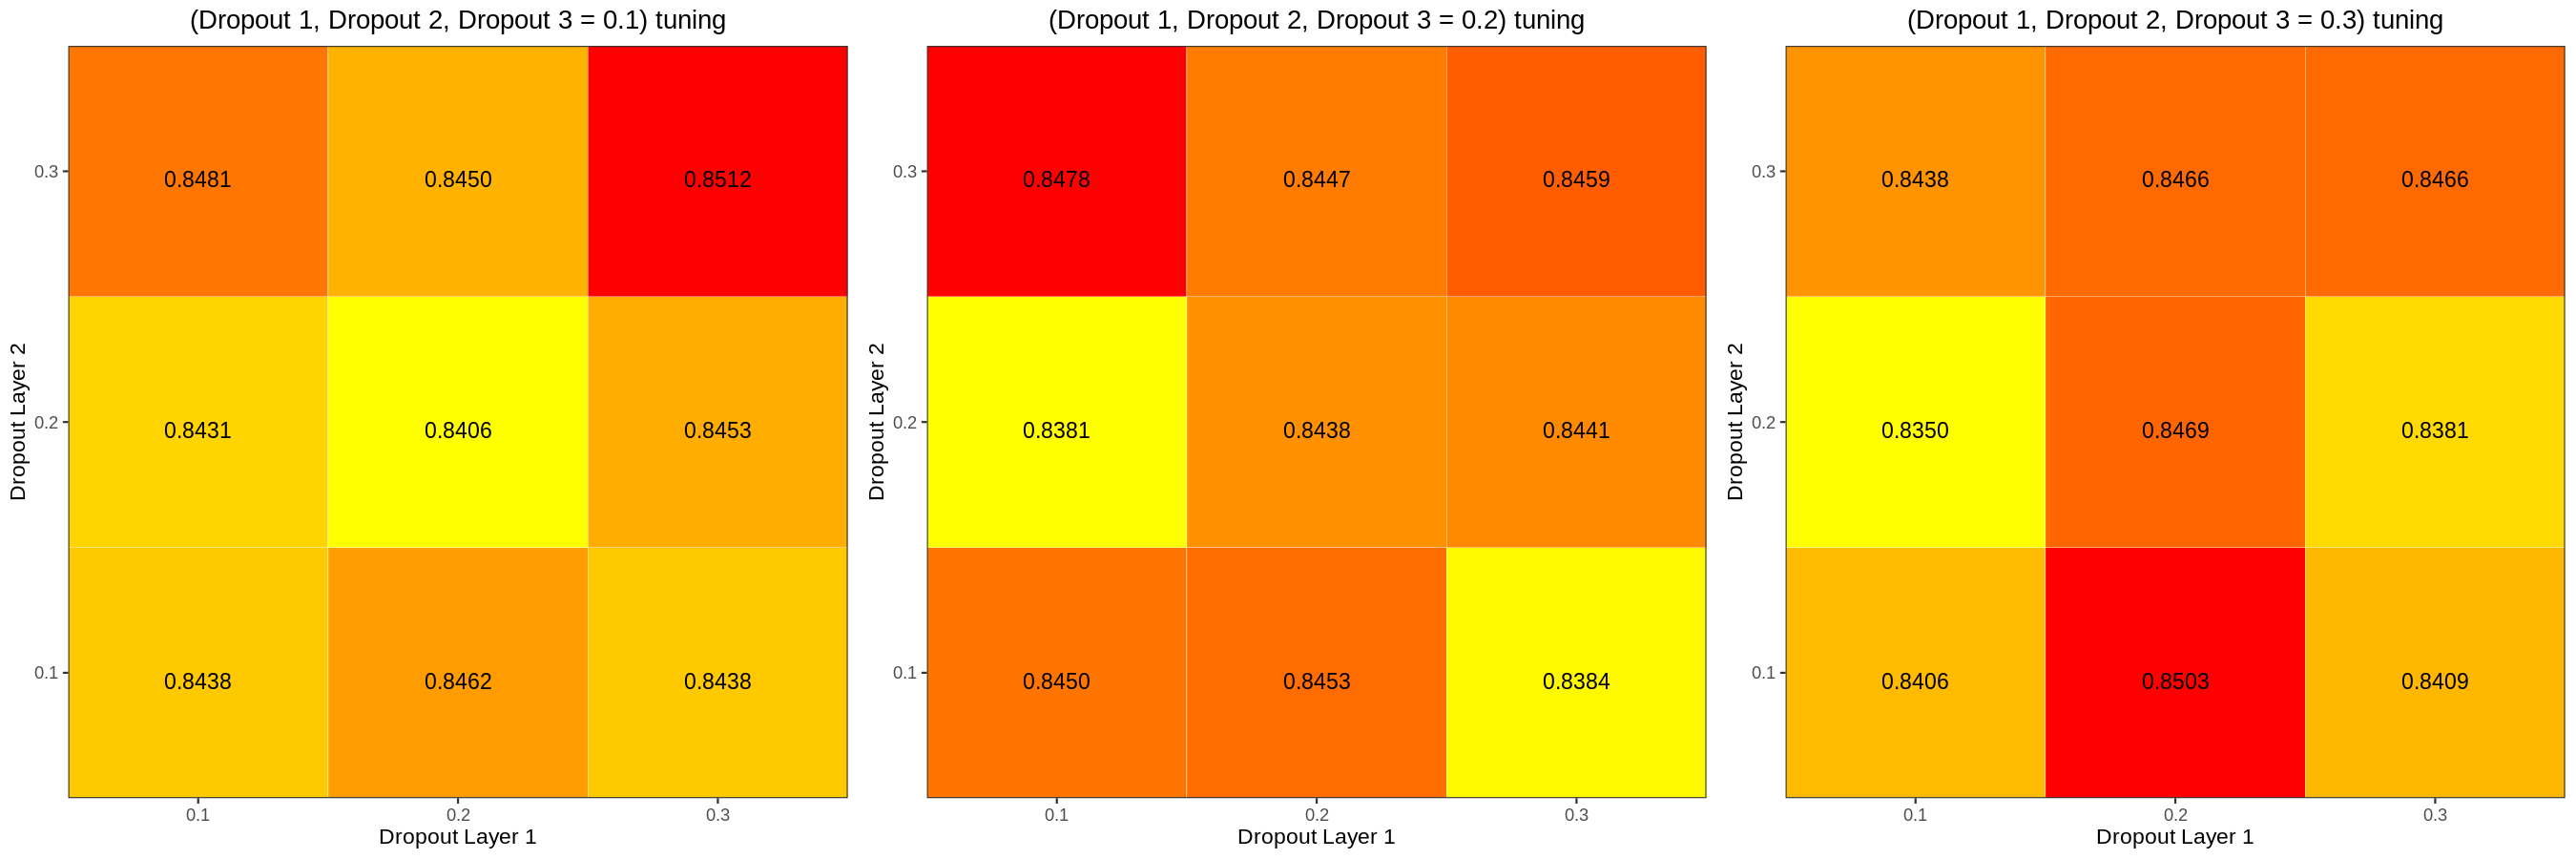

In [19]:
file.txt <- c("../Tuner_Results/Dropouts/Grid_Dropouts_Drop3_0.1.txt", 
              "../Tuner_Results/Dropouts/Grid_Dropouts_Drop3_0.2.txt", 
              "../Tuner_Results/Dropouts/Grid_Dropouts_Drop3_0.3.txt")
plot_dropout_grid(file.txt, 18, 6, 150)

**Best result:**
* **layer 1 dropout: `0.3`**;
* **layer 2 dropout: `0.3`**;
* **layer 3 dropout: `0.1`**.

<br>
<br>

### 4.5. - Activation functions <a class="anchor" id="AS4PA_FP.4.5."></a>
* [Index](#FP.i)

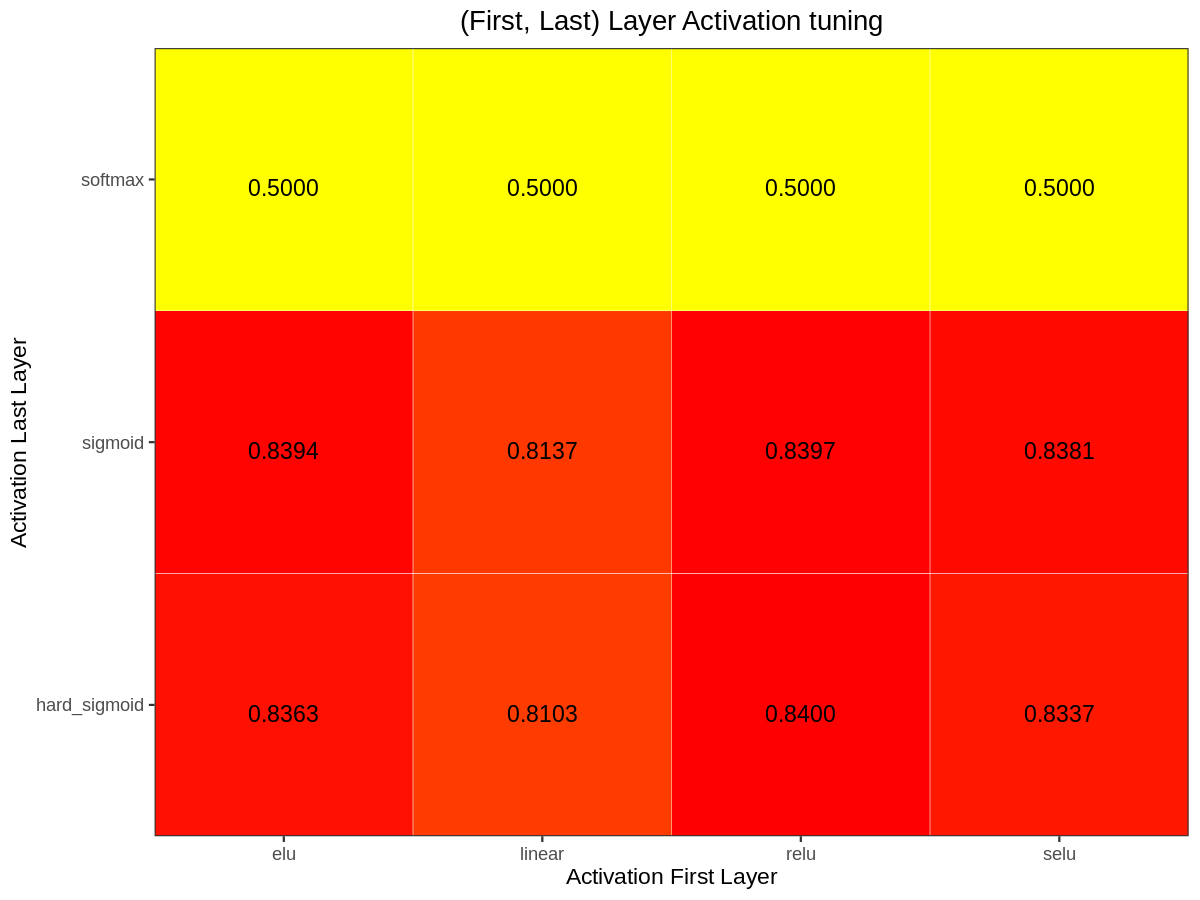

In [20]:
file.txt <- c("../Tuner_Results/Activation/Grid_Activation.txt")
plot_actI_actF_grid(file.txt, 8, 6, 150)

**Best result:**
* **first three layers: ```relu``` activation**;
* **last layer: ```hard_sigmoid``` activation**.

<br>
<br>

### 4.6. - Loss function <a class="anchor" id="AS4PA_FP.4.6."></a>
* [Index](#FP.i)

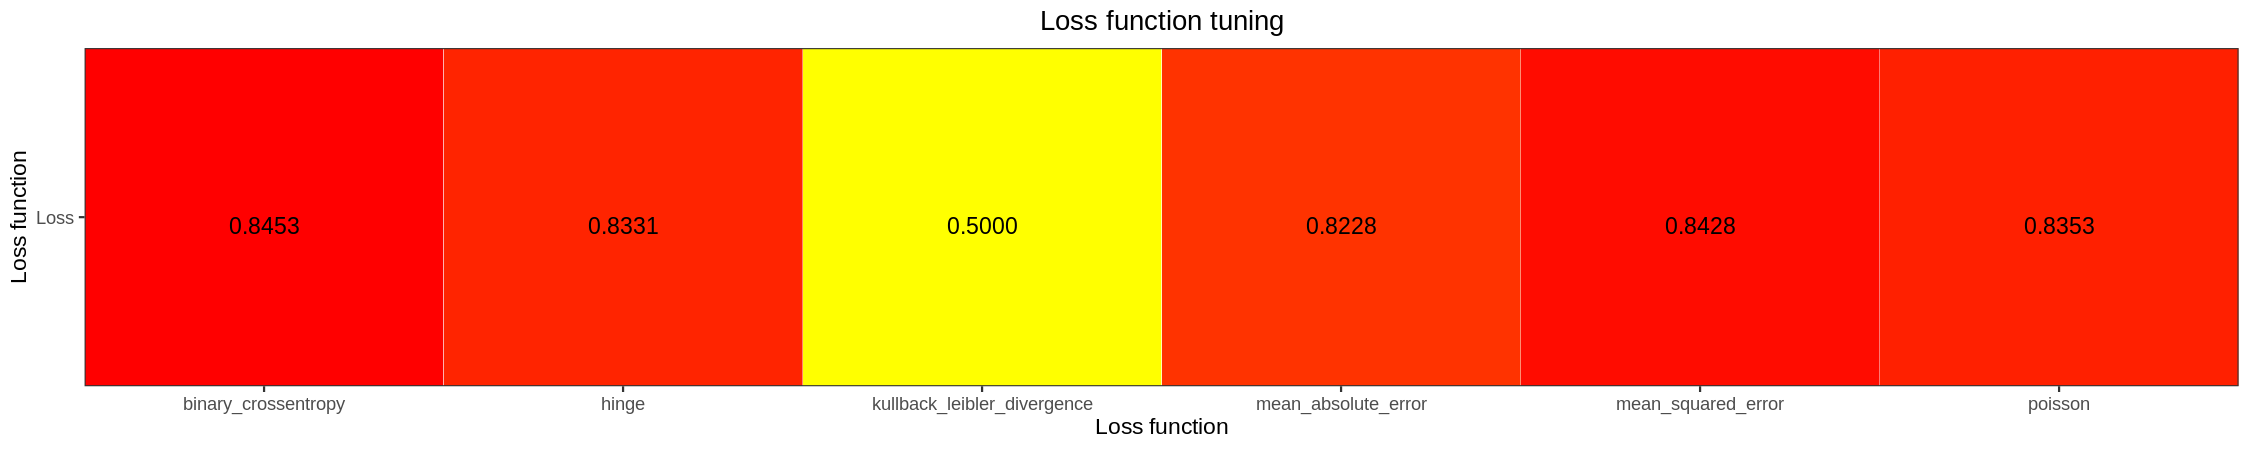

In [21]:
file.txt <- c("../Tuner_Results/Loss/Grid_Loss.txt")
plot_loss_grid(file.txt, 15, 3, 150)

**Best result:**
* **loss: `binary_crossentropy`**.

<br>
<br>

### 4.7. - Optimizer <a class="anchor" id="AS4PA_FP.4.7."></a>
* [Index](#FP.i)

**RMSProp (Best result: `0.003`, `0.9`)**

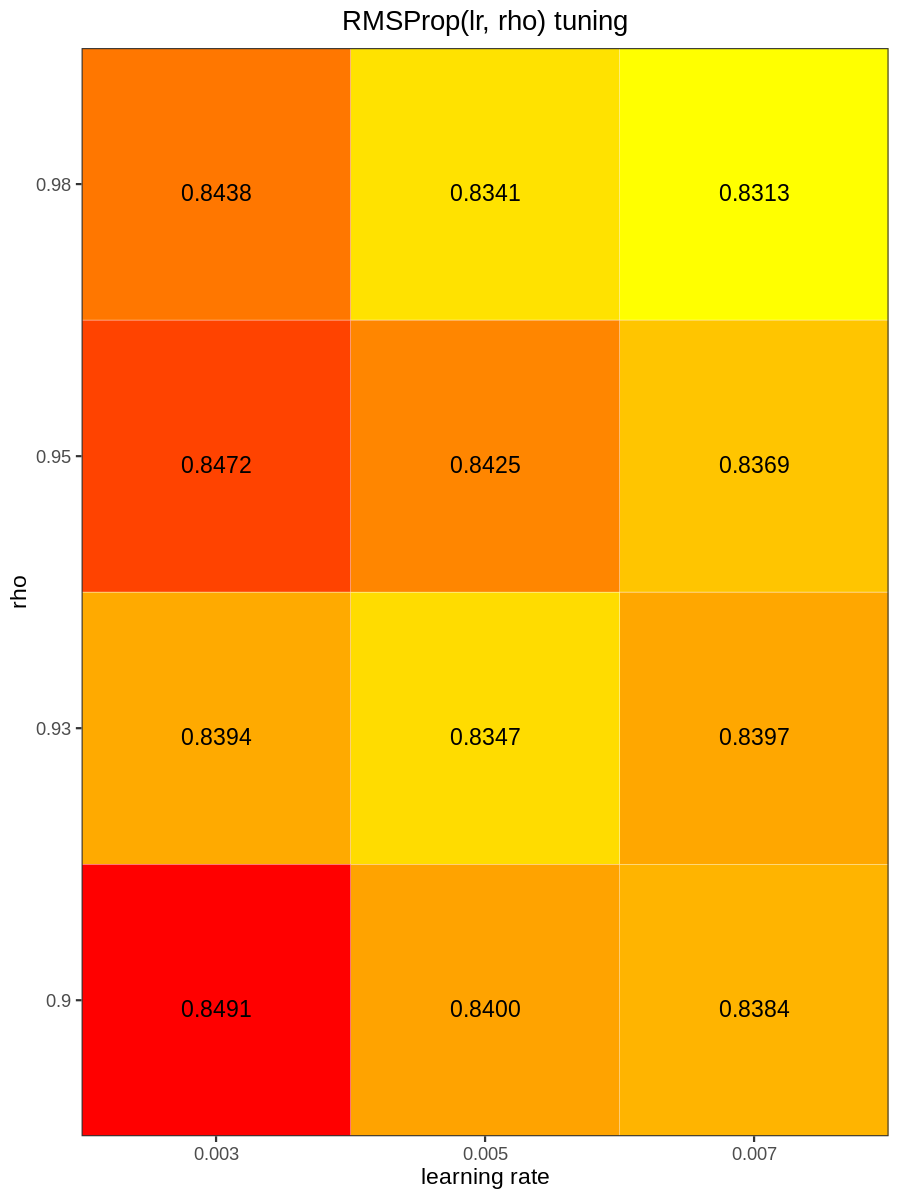

In [22]:
file.txt <- c("../Tuner_Results/RMS/Grid_RMS_Finer.txt")
plot_optimizer_rms_grid(file.txt, 6, 8, 150)

**ADAM (Best result: `0.001`, `0.93`, `0.995`)**

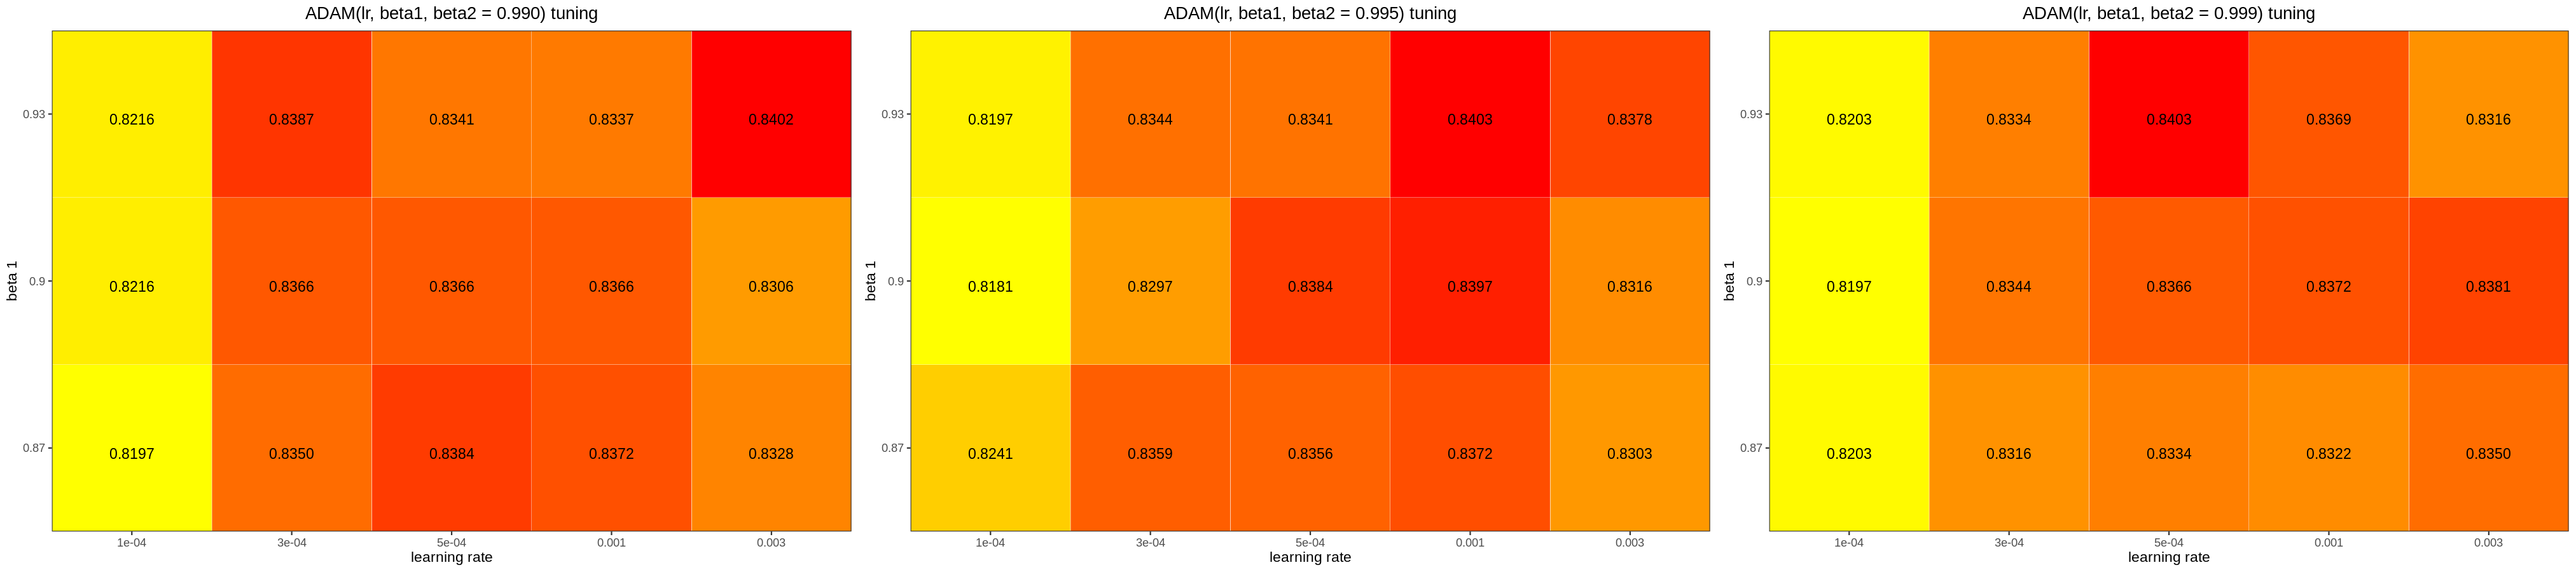

In [23]:
file.txt <- c("../Tuner_Results/ADAM/Grid_ADAM_beta2_0.990.txt", 
              "../Tuner_Results/ADAM/Grid_ADAM_beta2_0.995.txt", 
              "../Tuner_Results/ADAM/Grid_ADAM_beta2_0.999.txt")
plot_optimizer_adam_grid(file.txt, 27, 6, 150)

**NADAM (Best result: `0.001`, `0.9`, `0.995`)**

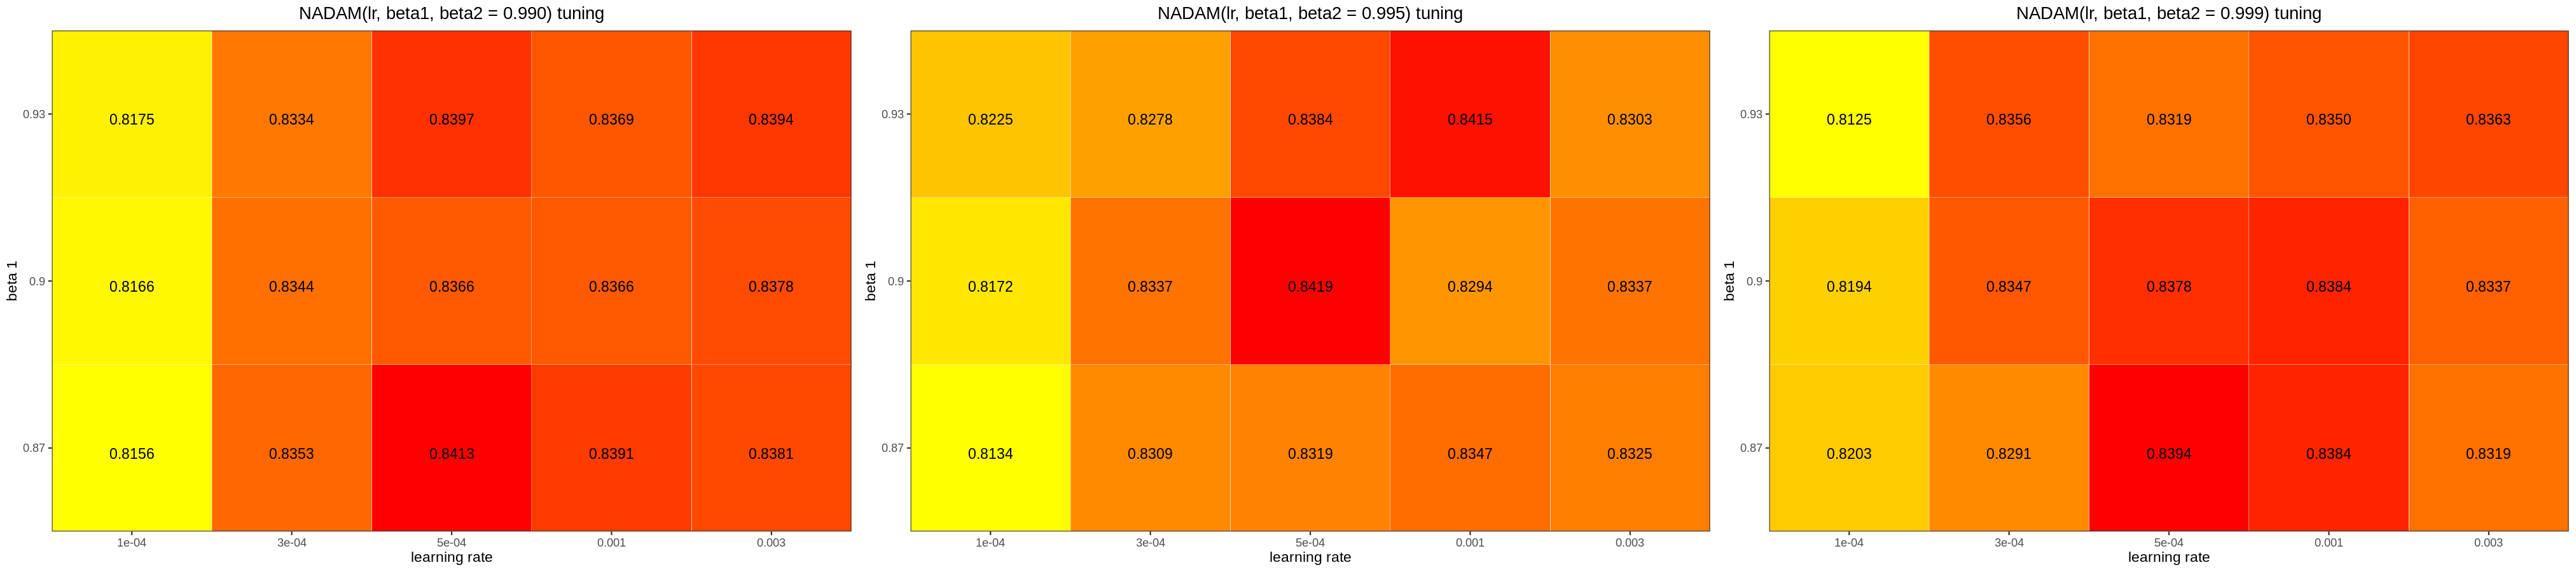

In [24]:
file.txt <- c("../Tuner_Results/NADAM/Grid_NADAM_Finer_beta2_0.990.txt", 
              "../Tuner_Results/NADAM/Grid_NADAM_Finer_beta2_0.995.txt", 
              "../Tuner_Results/NADAM/Grid_NADAM_Finer_beta2_0.999.txt")
plot_optimizer_nadam_grid(file.txt, 27, 6, 150)

**SGD (Best result: `0.001`, `0.9`)**

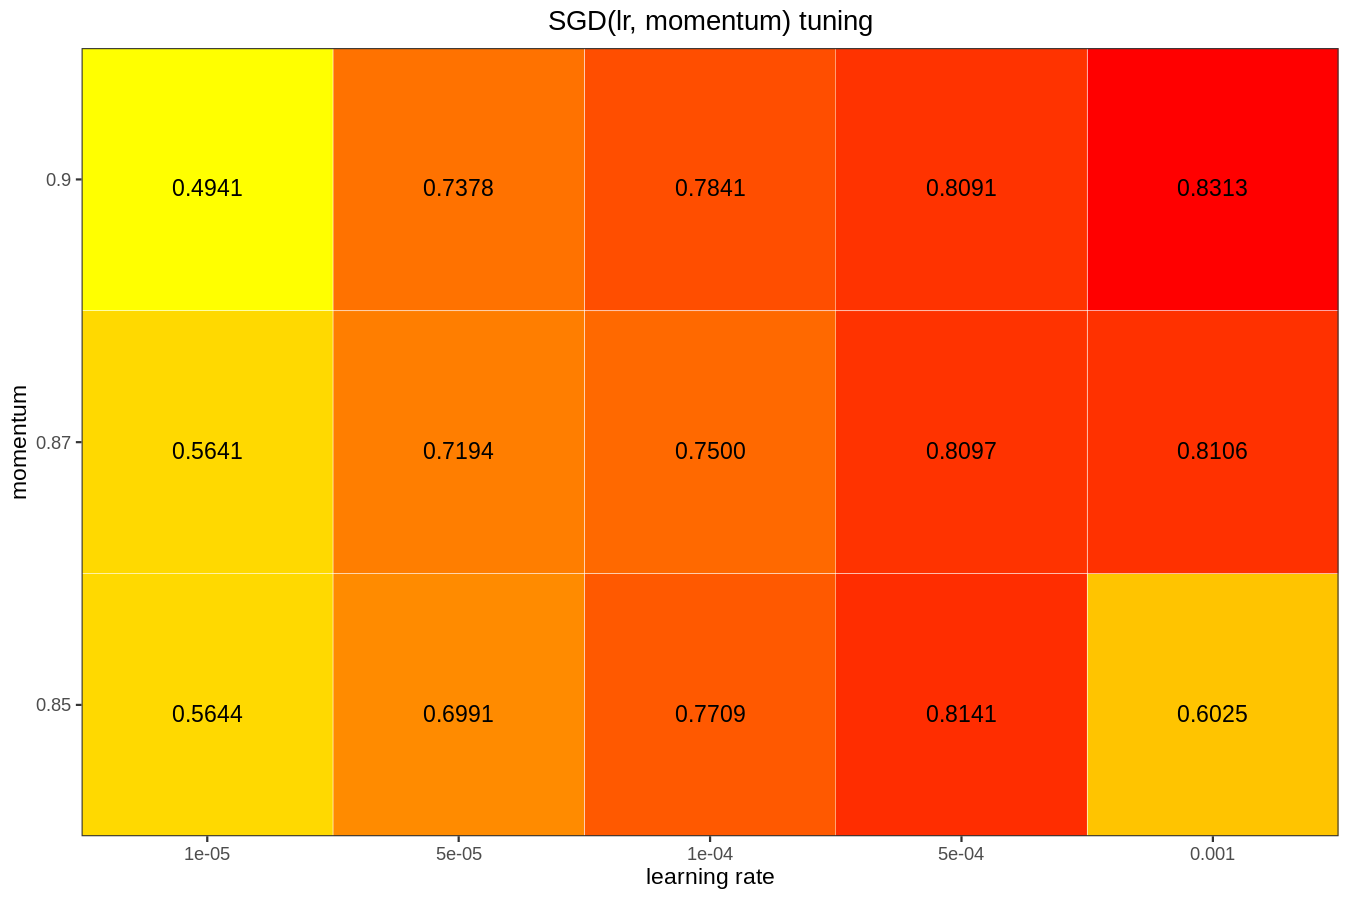

In [25]:
file.txt <- c("../Tuner_Results/SGD/Grid_SGD_Finer.txt")
plot_optimizer_sgd_grid(file.txt, 9, 6, 150)

**N.B.:** no best optimizer is found in a significant way, so we will consider one different model for each of them and compare the results.

<br>
<br>

### 4.8. - Regularizer <a class="anchor" id="AS4PA_FP.4.8."></a>
* [Index](#FP.i)

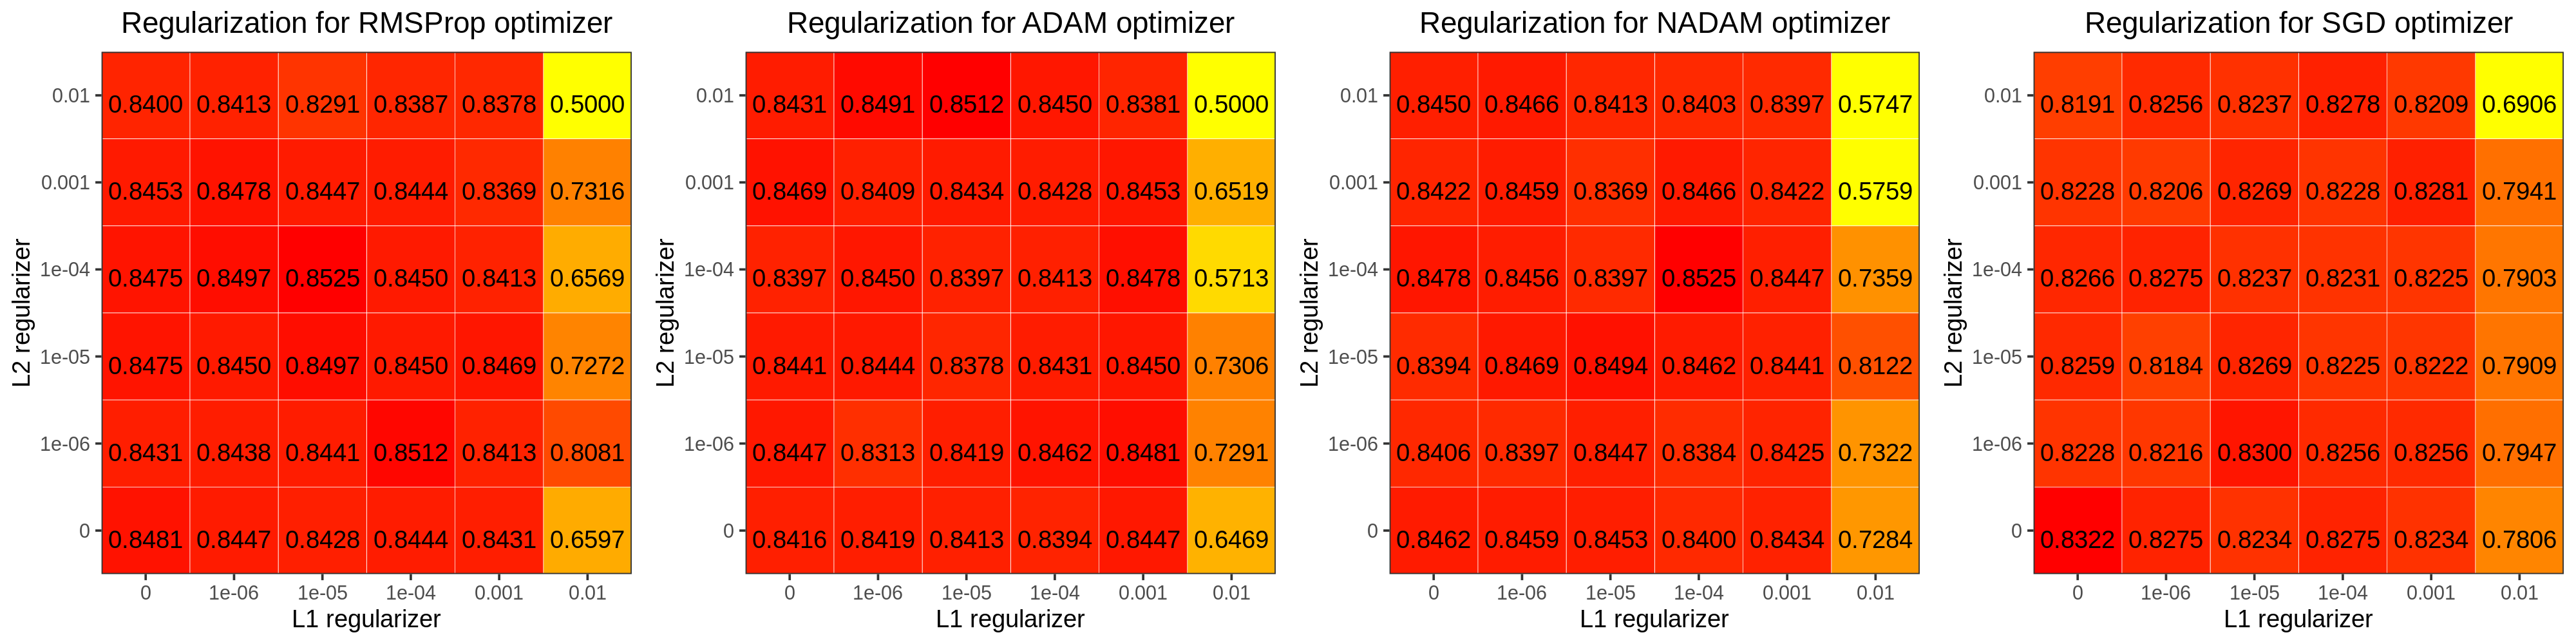

In [26]:
file.txt <- c("../Tuner_Results/Regularization/Grid_Reg_RMS.txt",
              "../Tuner_Results/Regularization/Grid_Reg_ADAM.txt",
              "../Tuner_Results/Regularization/Grid_Reg_NADAM.txt",
              "../Tuner_Results/Regularization/Grid_Reg_SGD.txt")
plot_l1_l2_grid(file.txt, 16, 4, 250)

**Best results:**
* **RMSProp: L1(`1e-5`), L2(`1e-6`)**;
* **ADAM: L1(`1e-5`), L2(`1e-2`)**;
* **NADAM:  L1(`1e-4`), L2(`1e-4`)**;
* **SGD:  L1(`0`), L2(`0`)**.
***

<br>
<br>
<br>
<br>
<br>

***
## 5. - <span style="color:red">**R**</span>esults <a class="anchor" id="AS4PA_FP.5."></a>
* [Index](#FP.i)

After having tuned almost every hyperparameter of the network, we have tested its performances on the LHCb cutted dataset. Note that at the end of the tuning we have obtained four possible best models, each one with a different tuned optimizer, so we will test them separately. Moreover, we will perform our test on the cutted dataset since the non-filtered one contains too much background.

We should point how the network predicts the result. Since, the last neuron has a sigmoid activation function, the output is bounded in the interval $[0,1]$. It can be interpreted for a certain input event as the probability of being a signal event. Therefore, in our analysis we inspect the output of the network for different thresholds of this output probability. This method is a generalization of the standard one provided by the keras function **```predict_classes```**, which uses as threshold a value of $0.5$.

The implementation of these algorithms is done in **```PredictionAnalysis```** and **```drawPrediction```** functions (the code can be found [**here**](https://github.com/mastrovalentz/Adv_Stat_Final_Project/blob/master/code/plotPrediction.R) for the formerm [**here**](https://github.com/mastrovalentz/Adv_Stat_Final_Project/blob/master/code/analysisPrediction.R)). In the cell below we load everything needed for this section.

In [27]:
source("../code/plotPrediction.R")
source("../code/analysisPrediction.R")

<br>
<br>

### 5.1. - First view of Neural Networks output <a class="anchor" id="AS4PA_FP.5.1."></a>
* [Index](#FP.i)

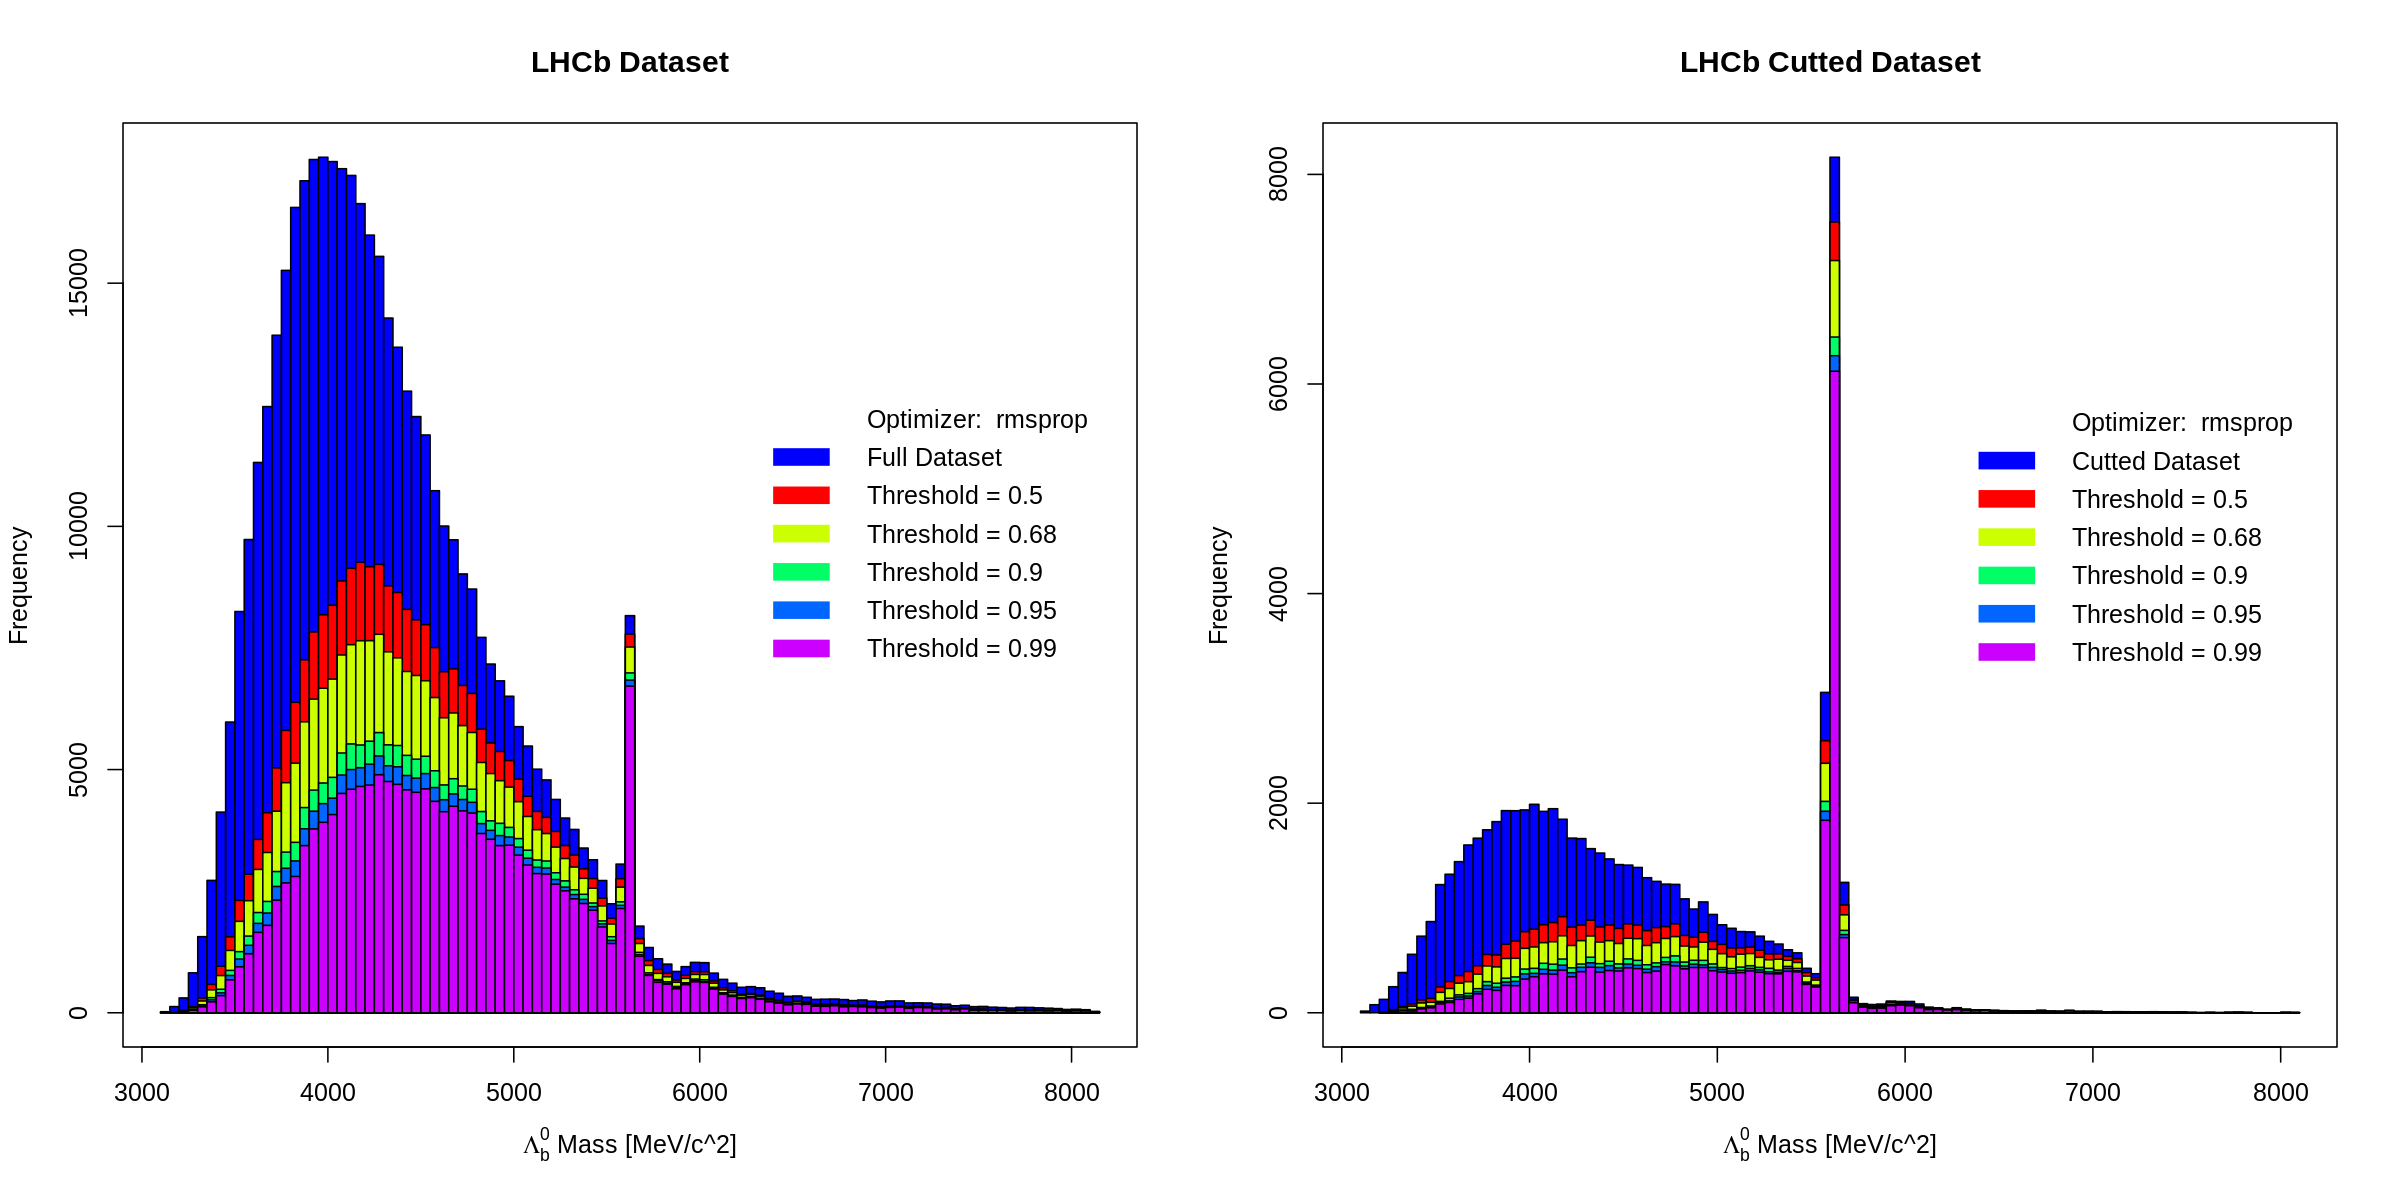

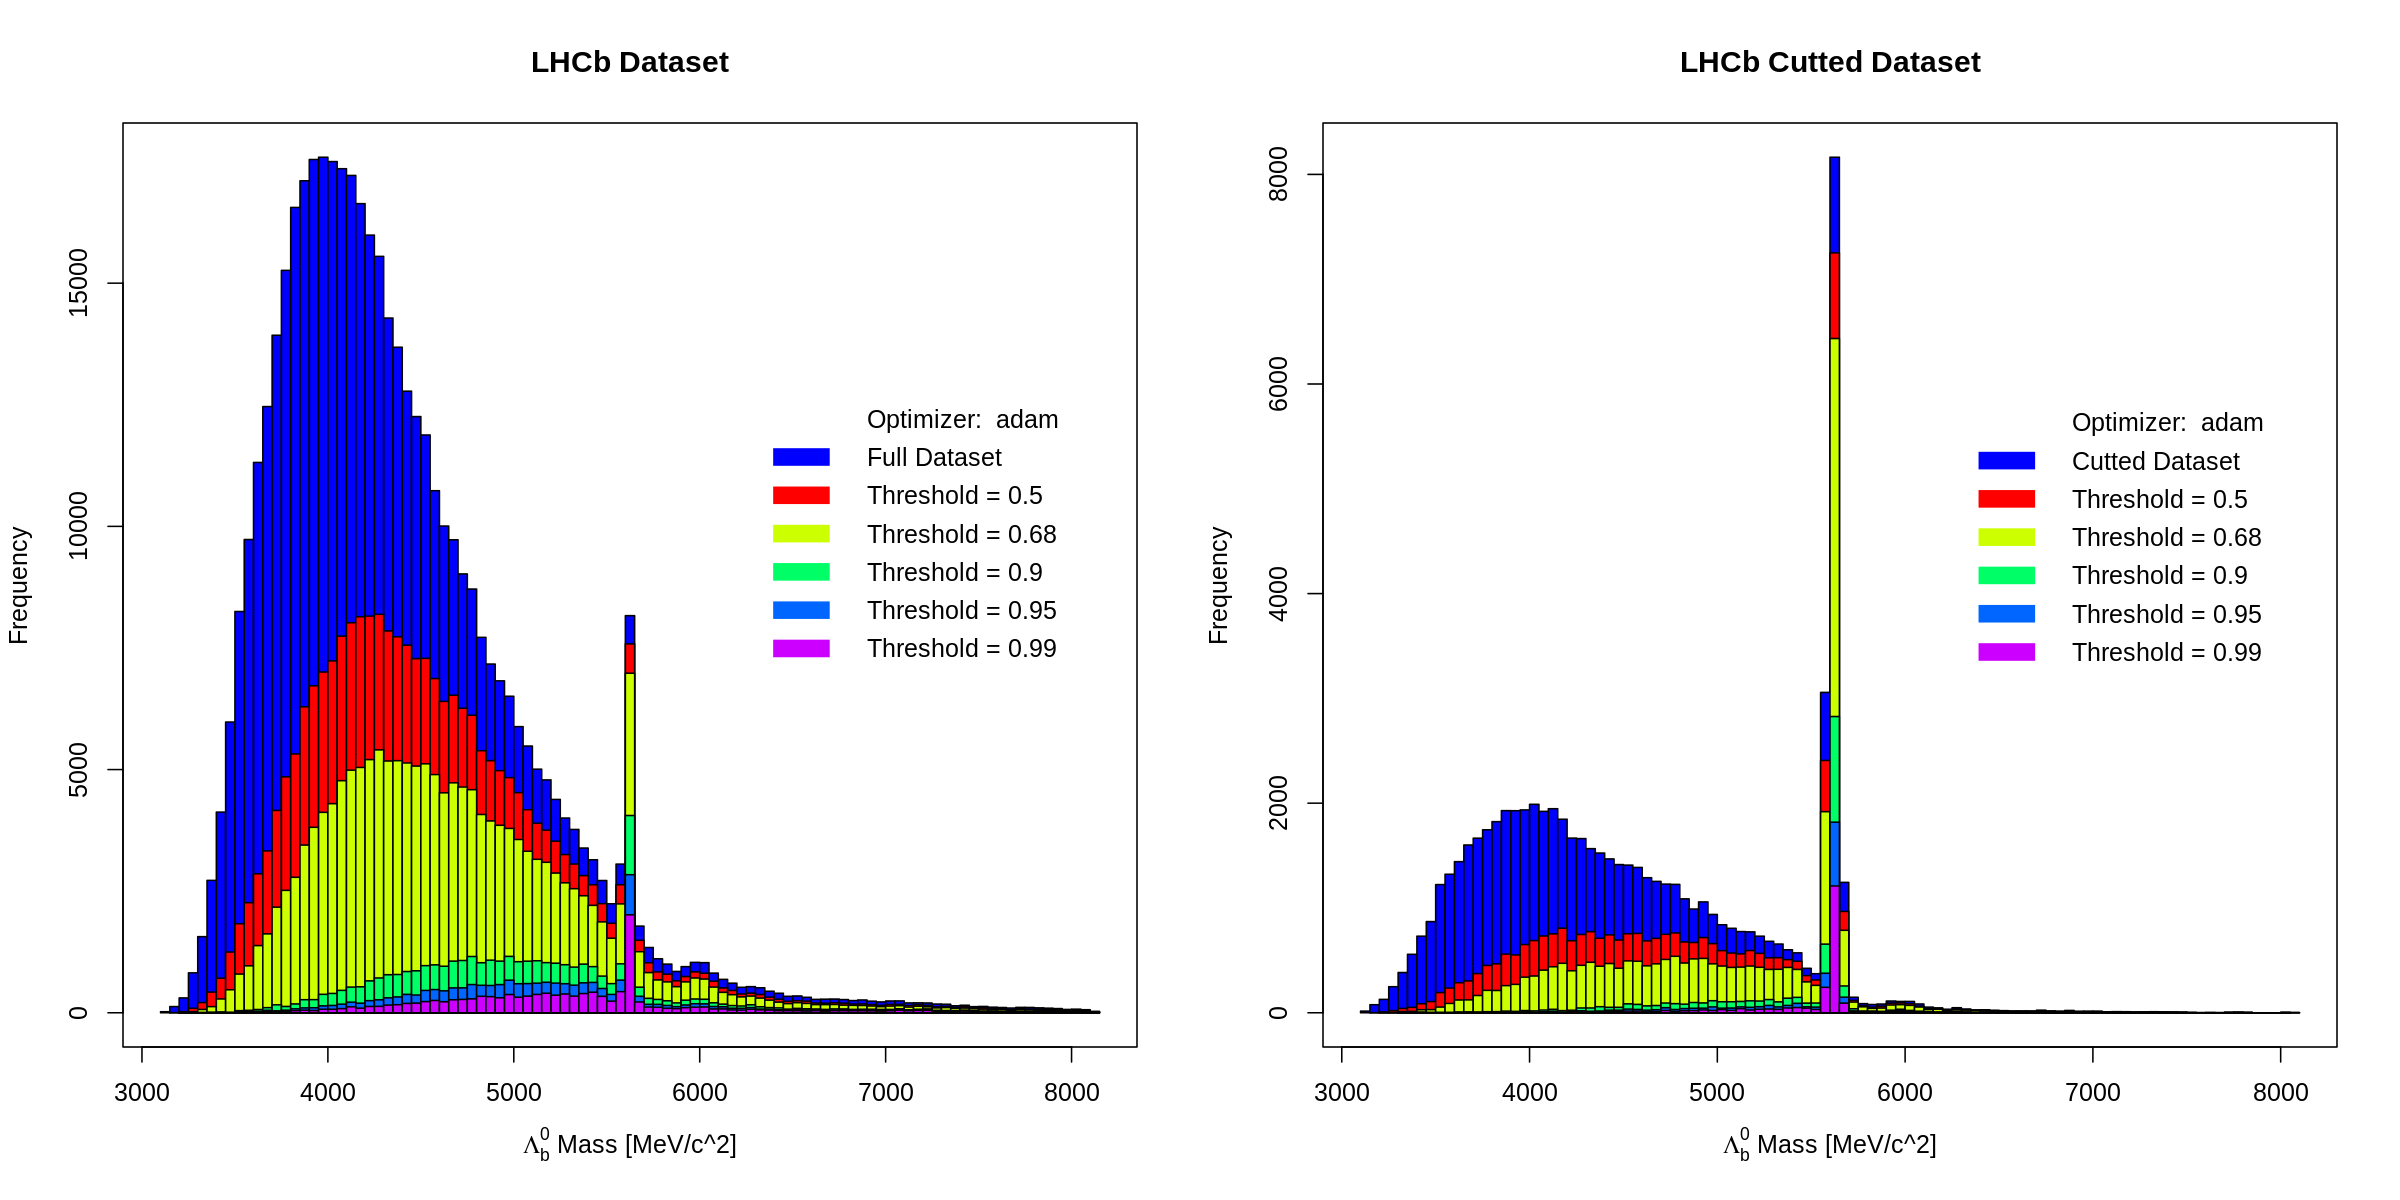

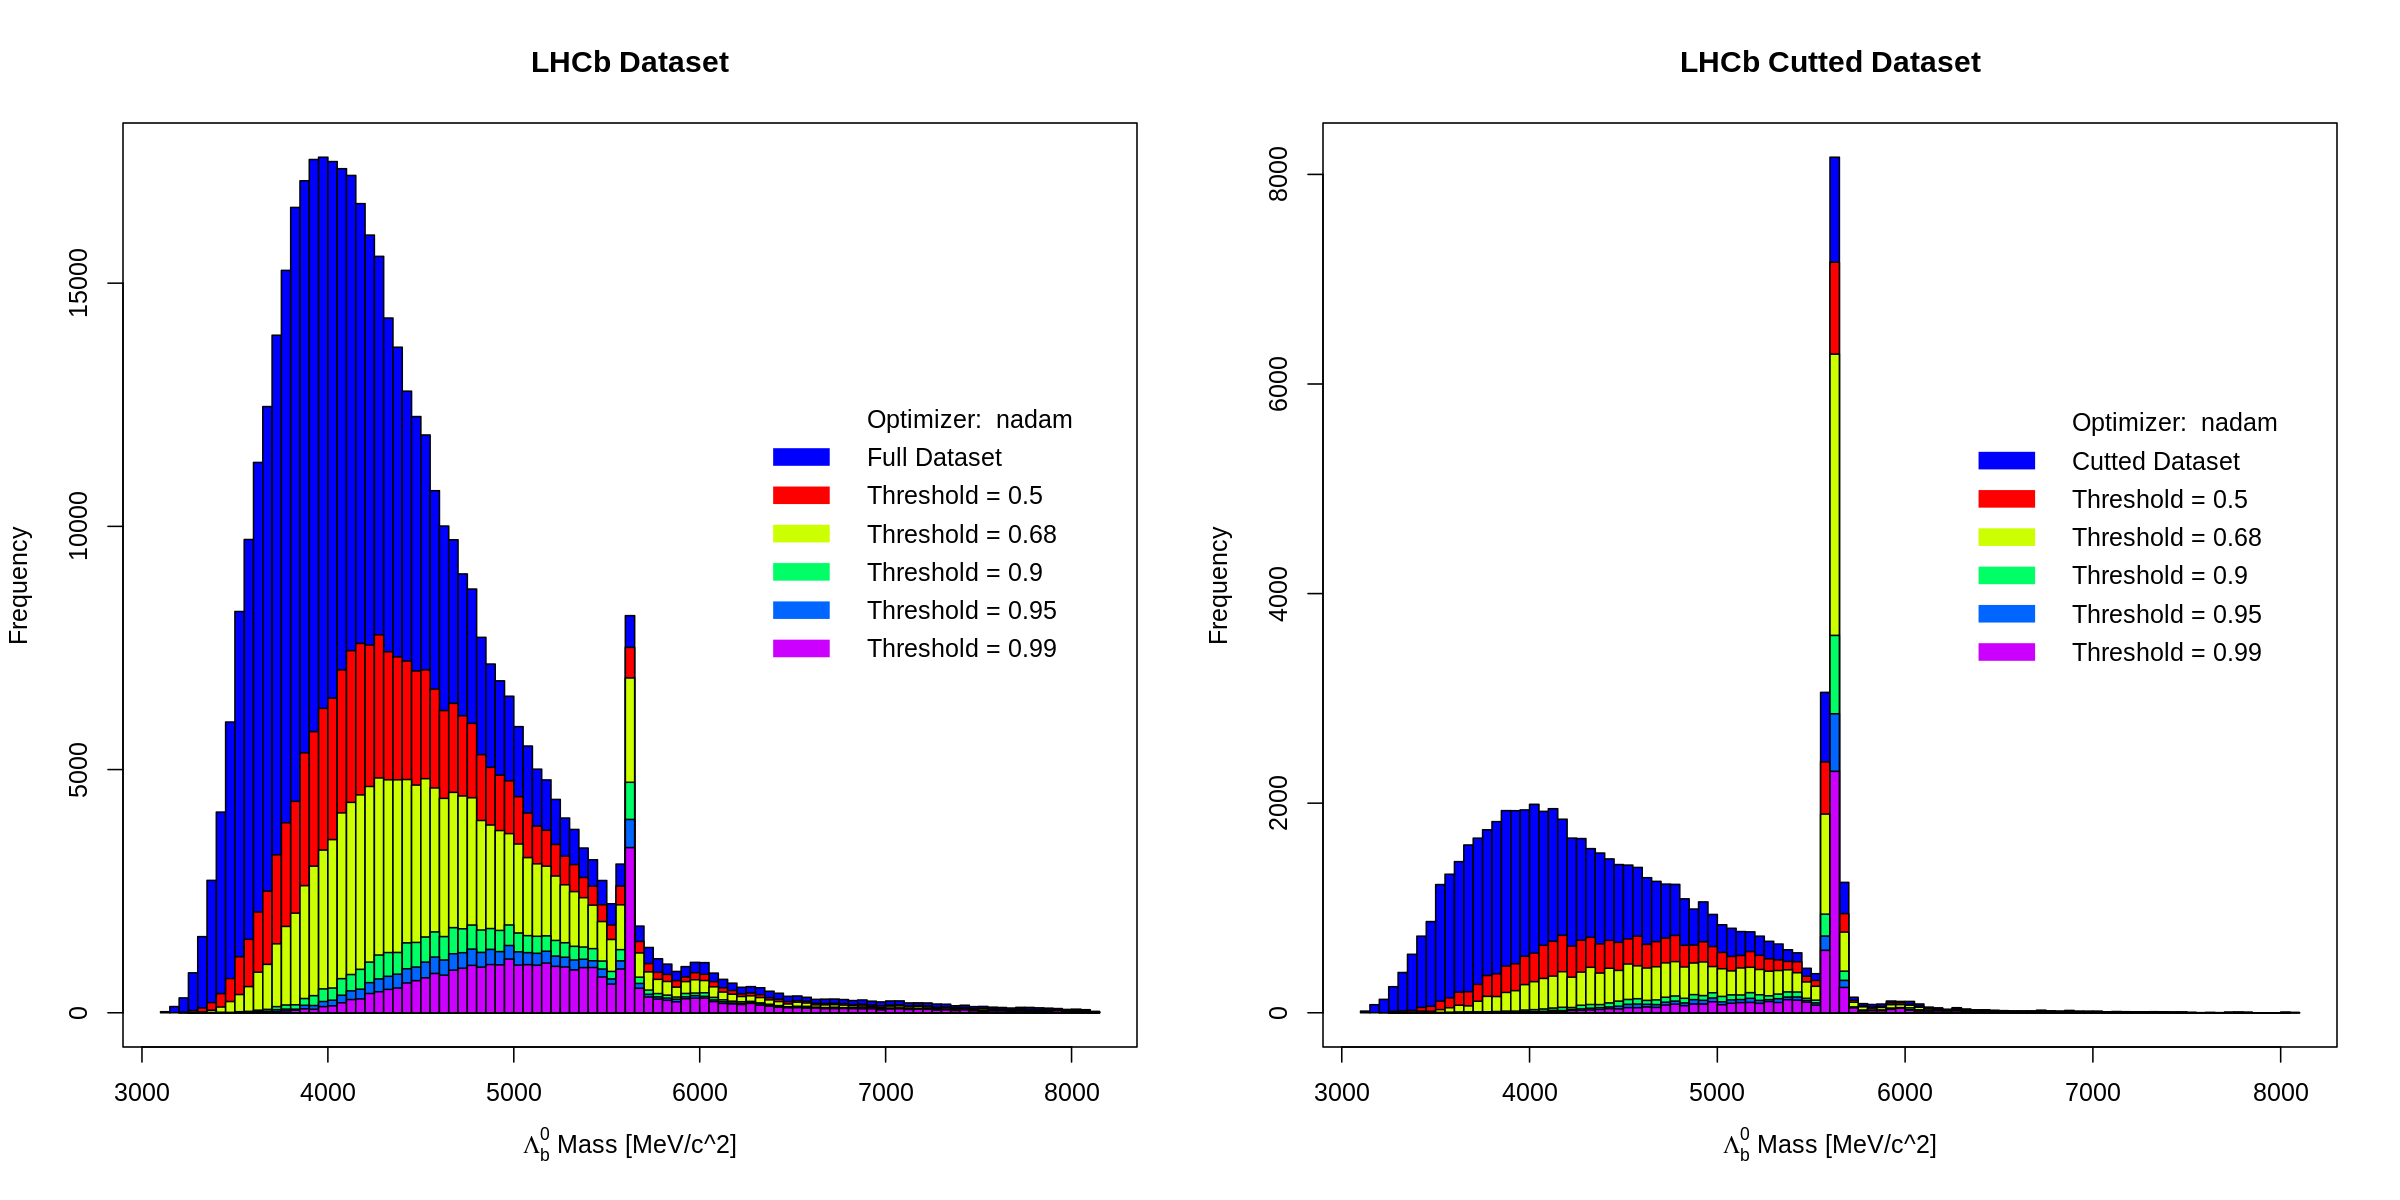

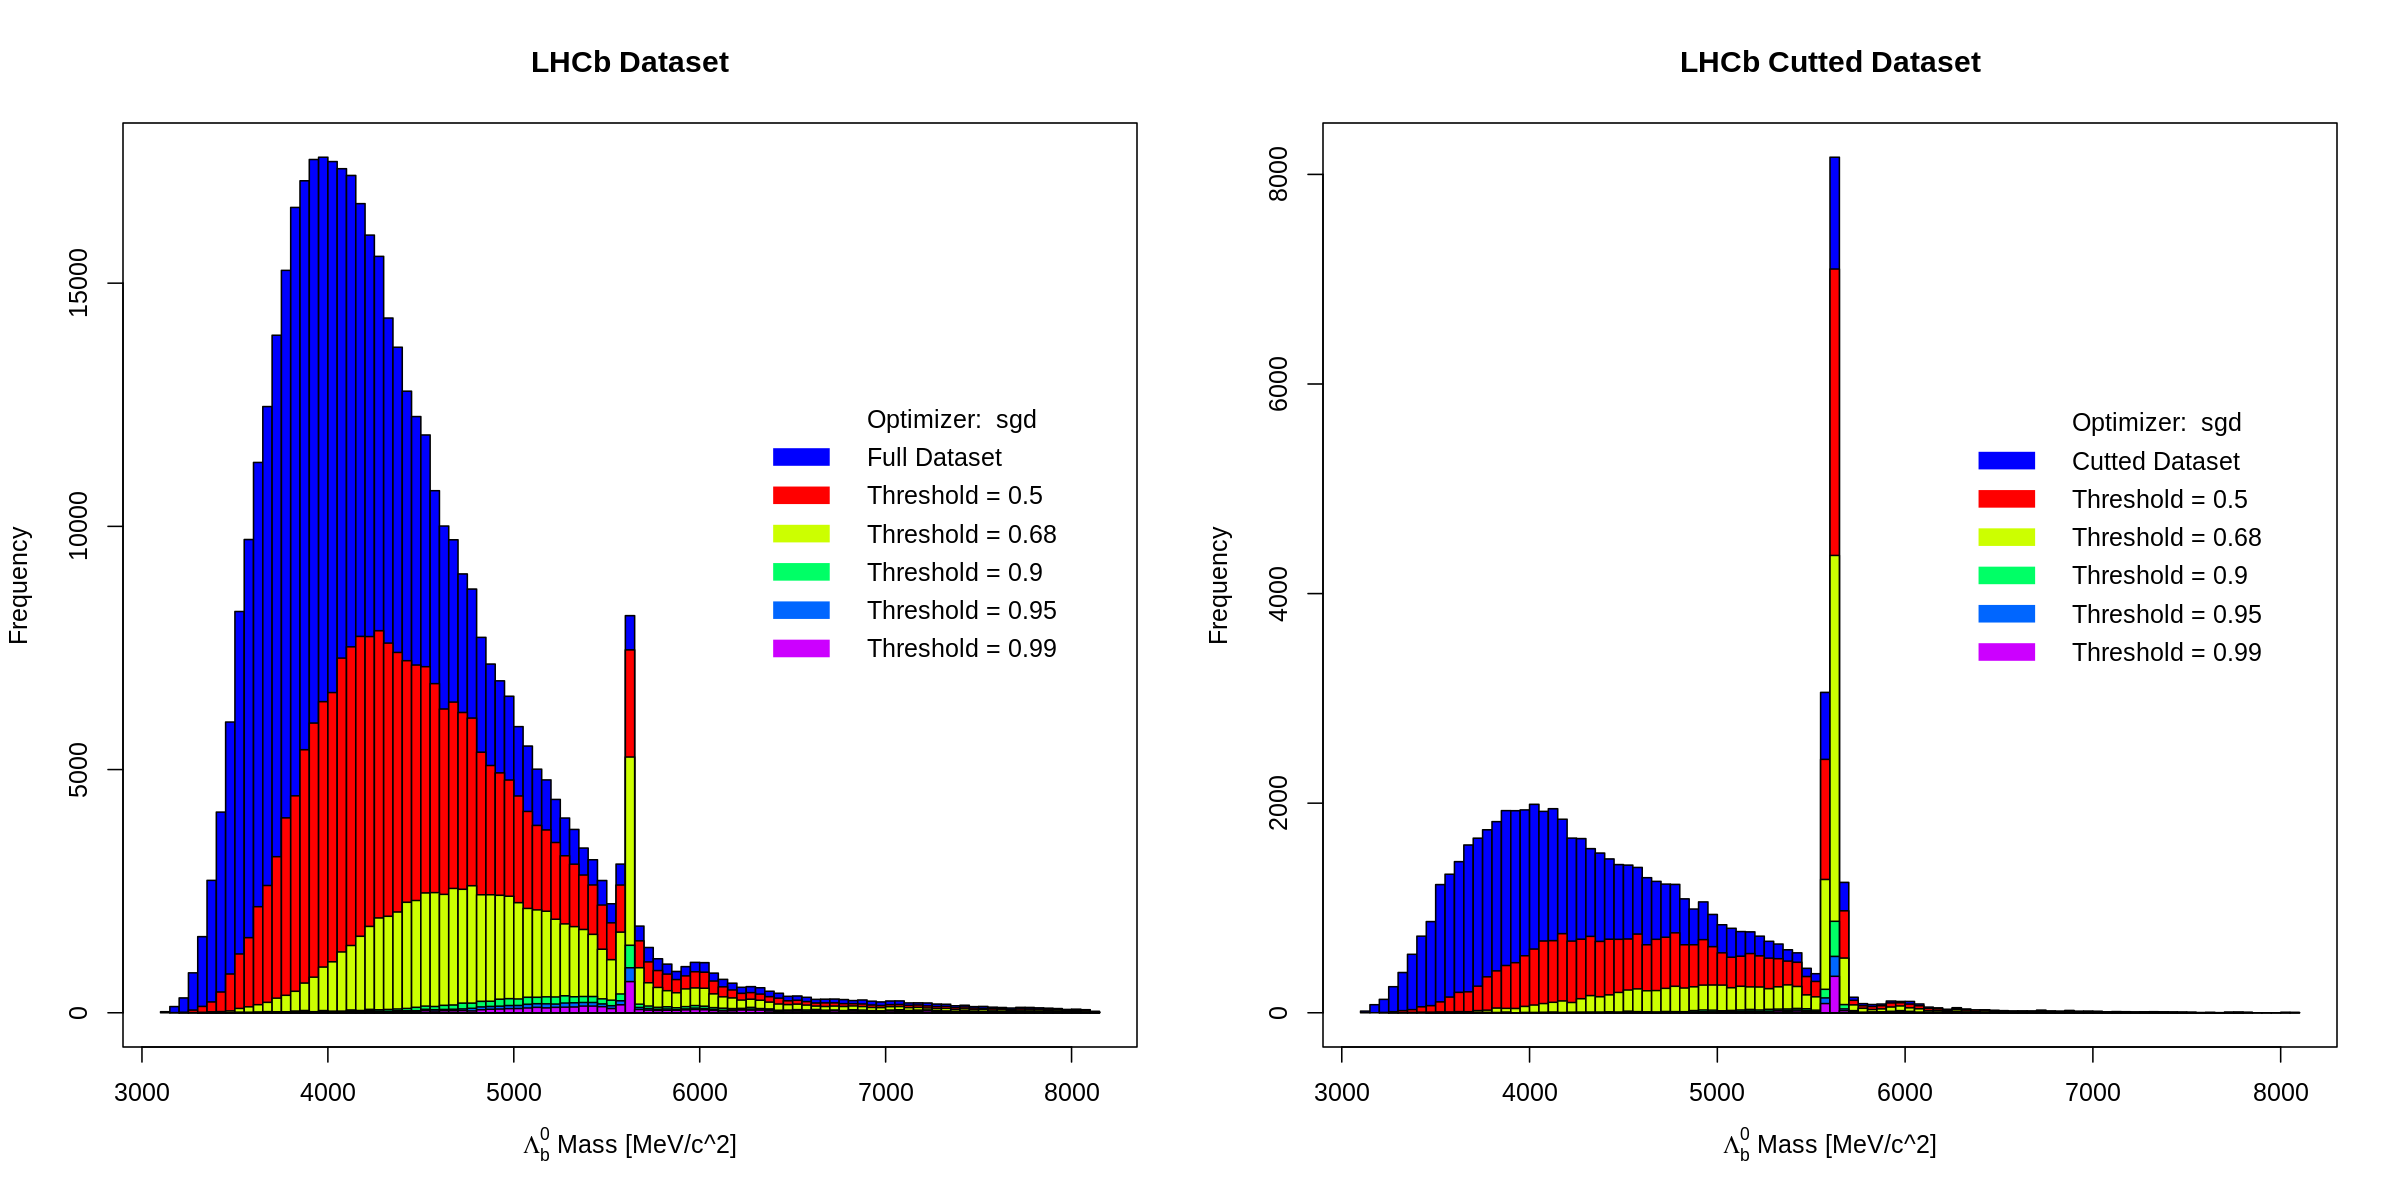

In [28]:
drawAllPrediction(prob=c(0.5, 0.68, 0.9, 0.95, 0.99), cols=rainbow(5), repr_plot_width=16, repr_plot_height=8, repr_plot_res=150)

As it is possible to see from the plots above, **the performances of the networks depend on the given threshold**. Moreover, the networks identify some background events near the sharper peak as signal events, but this fact does not translate into the failure of the algorithm. In fact, the outputs for some higher values of the thresholds prove that the network is **capable of identifying almost all the signal in the peak**. Therefore, we can state that the networks are **capable of identifying "interesting events" for further analysis**. 

A deeper analysis of the false positive outputs is done in the following subsection. What is left to point out here is the higher stability with respect to the threshold value of the network with RMSProp optimizer, whose results are the best obtained for this work.

<br>
<br>

### 5.2. - Deeper analysis of Neural Networks output <a class="anchor" id="AS4PA_FP.5.2."></a>
* [Index](#FP.i)

In this subsection, we compute for every model several meaningful quantities to understand the performances of the network. Here we report the meaning of the quantities listed in the cells below:

* **`prob`**: threshold of the network output probability for an event to be classified as a signal one;
* **`nSig`**: number of signal events detected by the network in the $\Lambda_b^0$ mass region of $[5550, 5680] \ \text{MeV/c^2}$;
* **`nBkg`**: number of background events, namely the number of events classified as signal with a probability lower that the threshold `prob`;
* **`LostSig`**: estimated fraction of missclassified signal, computed as the difference between the theoretical number of signal events and `nSig`, divided by the theoretical number;
* **`FalseSig`**: estimated fraction of false signal events, computed as the number of events classified as signal outside the $\Lambda_b^0$ mass region of $[5550, 5680] \ \text{MeV/c^2}$, divided by the theoretical number of background events in the dataset;
* **`nSigCut`**: the same as `nSig`, but for the LHCb cutted dataset;
* **`nBkgCut`**: the same as `nBkg`, but for the LHCb cutted dataset;
* **`LostSigCut`**: the same as `LostSig`, but for the LHCb cutted dataset;
* **`FalseSigCut`**: the same as `FalseSig`, but for the LHCb cutted dataset.

In [29]:
RMS.analysis   <- PredictionAnalysis(Archi_build_model, ArchiParams_RMS,   c(0.5, 0.68, 0.9, 0.95, 0.99))
ADAM.analysis  <- PredictionAnalysis(Archi_build_model, ArchiParams_ADAM,  c(0.5, 0.68, 0.9, 0.95, 0.99))
NADAM.analysis <- PredictionAnalysis(Archi_build_model, ArchiParams_NADAM, c(0.5, 0.68, 0.9, 0.95, 0.99))
SGD.analysis   <- PredictionAnalysis(Archi_build_model, ArchiParams_SGD,   c(0.5, 0.68, 0.9, 0.95, 0.99))

**RMSProp network results**

In [30]:
RMS.analysis

prob,nSig,nBkg,LostSig,FalseSig,nSigCut,nBkgCut,LostSigCut,FalseSigCut
<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
0.50,11055,242456,-0.5081855,0.4710563,10236,47986,-0.39645293,0.1826154
0.68,10544,279978,-0.4384720,0.3915345,9551,49431,-0.30300136,0.1704089
0.90,9592,331442,-0.3085948,0.2830046,8319,52041,-0.13492497,0.1482766
0.95,9347,343809,-0.2751705,0.2569593,7933,52850,-0.08226467,0.1414828
0.99,9112,353487,-0.2431105,0.2366701,7622,53499,-0.03983629,0.1360541


**ADAM network results**

In [31]:
ADAM.analysis

prob,nSig,nBkg,LostSig,FalseSig,nSigCut,nBkgCut,LostSigCut,FalseSigCut
<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
0.50,11268,225881,-0.5372442,0.50621159,10637,47150,-0.4511596,0.18960200
0.68,10131,306426,-0.3821282,0.33559581,9131,50349,-0.2457026,0.16241046
0.90,5177,434192,0.2937244,0.07172232,3610,61959,0.5075034,0.06461405
0.95,3684,450062,0.4974079,0.04083194,2367,64580,0.6770805,0.04248177
0.99,2755,458022,0.6241473,0.02572515,1627,66155,0.7780355,0.02907070


**NADAM network results**

In [32]:
NADAM.analysis

prob,nSig,nBkg,LostSig,FalseSig,nSigCut,nBkgCut,LostSigCut,FalseSigCut
<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
0.50,11204,234408,-0.5285130,0.48802802,10441,47539,-0.4244202,0.18650220
0.68,10078,312309,-0.3748977,0.32306949,8911,50797,-0.2156889,0.15874851
0.90,6036,422443,0.1765348,0.09512054,4187,60667,0.4287858,0.07609778
0.95,4811,438112,0.3436562,0.06408620,3081,62983,0.5796726,0.05666378
0.99,3893,447475,0.4688950,0.04594130,2369,64481,0.6768076,0.04403970


**SGD network results**

In [33]:
SGD.analysis

prob,nSig,nBkg,LostSig,FalseSig,nSigCut,nBkgCut,LostSigCut,FalseSigCut
<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
0.50,11077,225016,-0.5111869,0.508480512,10436,47522,-0.4237381,0.1868555459
0.68,5148,423139,0.2976808,0.095533067,3825,61364,0.4781719,0.0707172914
0.90,329,470233,0.9551160,0.004701130,141,69244,0.9807640,0.0033246603
0.95,126,471533,0.9828104,0.002344119,52,69451,0.9929059,0.0014294433
0.99,61,472009,0.9916780,0.001461046,32,69509,0.9956344,0.0008191192


From the cells above, we can observe that the results are **compatible with the trained networks test accuracies**, in particular from the value of ```FalseSigCut``` for a threshold of $0.5$. Moreover, we observe that:
* the **standard threshold of $0.5$ is not sufficient** for all the models to effectively separate signal from background;
* increasing the threshold results in a more efficient discrimination of the signal over background, up to a certain value of the threshold itself;
* depending on the model, a too high value of the threshold may lead to the loss of a consistent fraction of the signal events;
* **NADAM** and **RMSProp** with a **threshold of $0.68$** (euristically, $1\sigma$ equivalent) are the best model obtained for the purpose, with a preference for RMSProp due to a visually higher stability.
***

<br>
<br>
<br>
<br>
<br>

***
## 6. - Conclusions <a class="anchor" id="AS4PA_FP.6."></a>
* [Index](#FP.i)

**Outlook**

In this work, we have applied advanced Deep Learning techniques to a signal over background discrimination task. In particular, we have tried to provide a useful application to a HEP search for b-Baryon rare decays for the identification of useful events. After having inspected the main features of the given benchmark datasets, we have chosen the most discriminating ones for our purpose and exploited all of them to perform a multivariate analysis through a Deep Neural Network.

Almost every hyperparameter of a selected architecture of the DNN has been tuned to reach state-of-art performances. In particular, we have studied carefully the fraction of the background training dataset with respect to the signal training one, showing how critical the choice of this parameter is. At the end of the tuning procedure, we have selected four models differing only in their optimizer algorithm and regularization parameters. Each of them has a certain advantage with respect to the others, but the most promising one is the "RMSProp" model.

Lastly, we have generalized the discrimination procedure employing a probability threshold for the network output different from the standard value of $0.5$. We have also proved the dependency of the results on the value of this parameter, finding an optimal value for the task at a value of $0.68$, euristically equivalent to a selection inside $1\sigma$ confidence level.

**Future developements**

Some improvements can be done to the analysis:
* CNN rather than DNN should be tested; this can lead to less complex models (less parameters) but with higher performances;
* a bigger signal training dataset may significantly improve the network performance, given the richness of the background training dataset;
* data augmentation may be performed on signal dataset to overcome the small number of events with respect to the background dataset;
* more complex structures may be tested with bigger datasets, however requiring a higher computational effort.
***

<br>
<br>
<br>
<br>
<br>

***
## <span style="color:red">**R**</span>eferences <a class="anchor" id="AS4PA_FP.REF."></a>
* [Index](#FP.i)

* [**[1]**](#AS4PA_FP.REF.1.) : "*Study of the decay $\Lambda_b^0 \longrightarrow \Lambda_c^{∗+} \pi^{-}\pi^{+}\pi^{-}$*", Pietro Argenton, http://tesi.cab.unipd.it/62008/1/Argenton_Pietro_tesi.pdf
* [**[2]**](#AS4PA_FP.REF.2.) : https://github.com/mastrovalentz/Adv_Stat_Final_Project
***